<a href="https://colab.research.google.com/github/gabrielaoliveirasilva489/reposigab/blob/main/2%C2%BA_Trab_Gabi_VilasBoas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [400]:
# gráficos estáticos logo abaixo da célula,
%matplotlib inline

In [401]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, cohen_kappa_score
from sklearn.metrics import classification_report
#A biblioteca Missingno oferece uma maneira muito boa de visualizar a distribuição de valores NaN
import missingno as msno
import statistics  as sts

In [402]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [403]:
df= pd.read_csv('/content/drive/MyDrive/Heart Disease Dataset.csv',delimiter=',')

In [405]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [406]:
#Verificando quantas linhas e colunas tem
df.shape

(303, 14)

In [407]:
#Verificando a quantidade de valores nulos
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

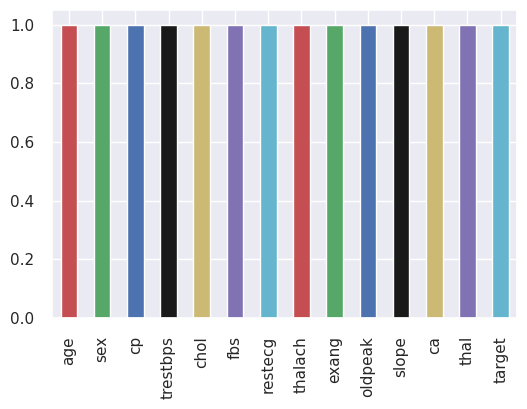

In [408]:
#Percentual de dados não ausentes
fig, ax = plt.subplots(figsize=(6, 4))
colors = 'rgbkymc'
graf = (1 - df.isnull().mean()).abs().plot.bar(ax=ax,color=list(colors))
#fig.savefig("mlpr_0402.png", dpi=300)

In [409]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [410]:
df.columns = ['idade', 'sexo','tipo_dor_peito', 'pressao_arterial_repouso', 'colesterol', 'acucar_no_sangue_em_jejum','ecg_repouso','frequencia_cardiaca_maxima','angina_induzida_por_exercicio','depressao_st_induzida_por_exercicio','inclinacao_st_do_pico_do_exercicio','num_vasos_principais','talassemia', 'doenca_cardiaca']

In [411]:
display(df)

,idade,sexo,tipo_dor_peito,pressao_arterial_repouso,colesterol,acucar_no_sangue_em_jejum,ecg_repouso,frequencia_cardiaca_maxima,angina_induzida_por_exercicio,depressao_st_induzida_por_exercicio,inclinacao_st_do_pico_do_exercicio,num_vasos_principais,talassemia,doenca_cardiaca
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [412]:
df.describe()

,idade,sexo,tipo_dor_peito,pressao_arterial_repouso,colesterol,acucar_no_sangue_em_jejum,ecg_repouso,frequencia_cardiaca_maxima,angina_induzida_por_exercicio,depressao_st_induzida_por_exercicio,inclinacao_st_do_pico_do_exercicio,num_vasos_principais,talassemia,doenca_cardiaca
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [413]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
idade,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sexo,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
tipo_dor_peito,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
pressao_arterial_repouso,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
colesterol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
acucar_no_sangue_em_jejum,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
ecg_repouso,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
frequencia_cardiaca_maxima,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
angina_induzida_por_exercicio,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
depressao_st_induzida_por_exercicio,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


In [414]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   idade                                303 non-null    int64  
 1   sexo                                 303 non-null    int64  
 2   tipo_dor_peito                       303 non-null    int64  
 3   pressao_arterial_repouso             303 non-null    int64  
 4   colesterol                           303 non-null    int64  
 5   acucar_no_sangue_em_jejum            303 non-null    int64  
 6   ecg_repouso                          303 non-null    int64  
 7   frequencia_cardiaca_maxima           303 non-null    int64  
 8   angina_induzida_por_exercicio        303 non-null    int64  
 9   depressao_st_induzida_por_exercicio  303 non-null    float64
 10  inclinacao_st_do_pico_do_exercicio   303 non-null    int64  
 11  num_vasos_principais            

In [415]:
#Agrupando o sexo
#1 = masculino; 0 = feminino
group = df.groupby(['sexo']).size()
group

sexo
0     96
1    207
dtype: int64

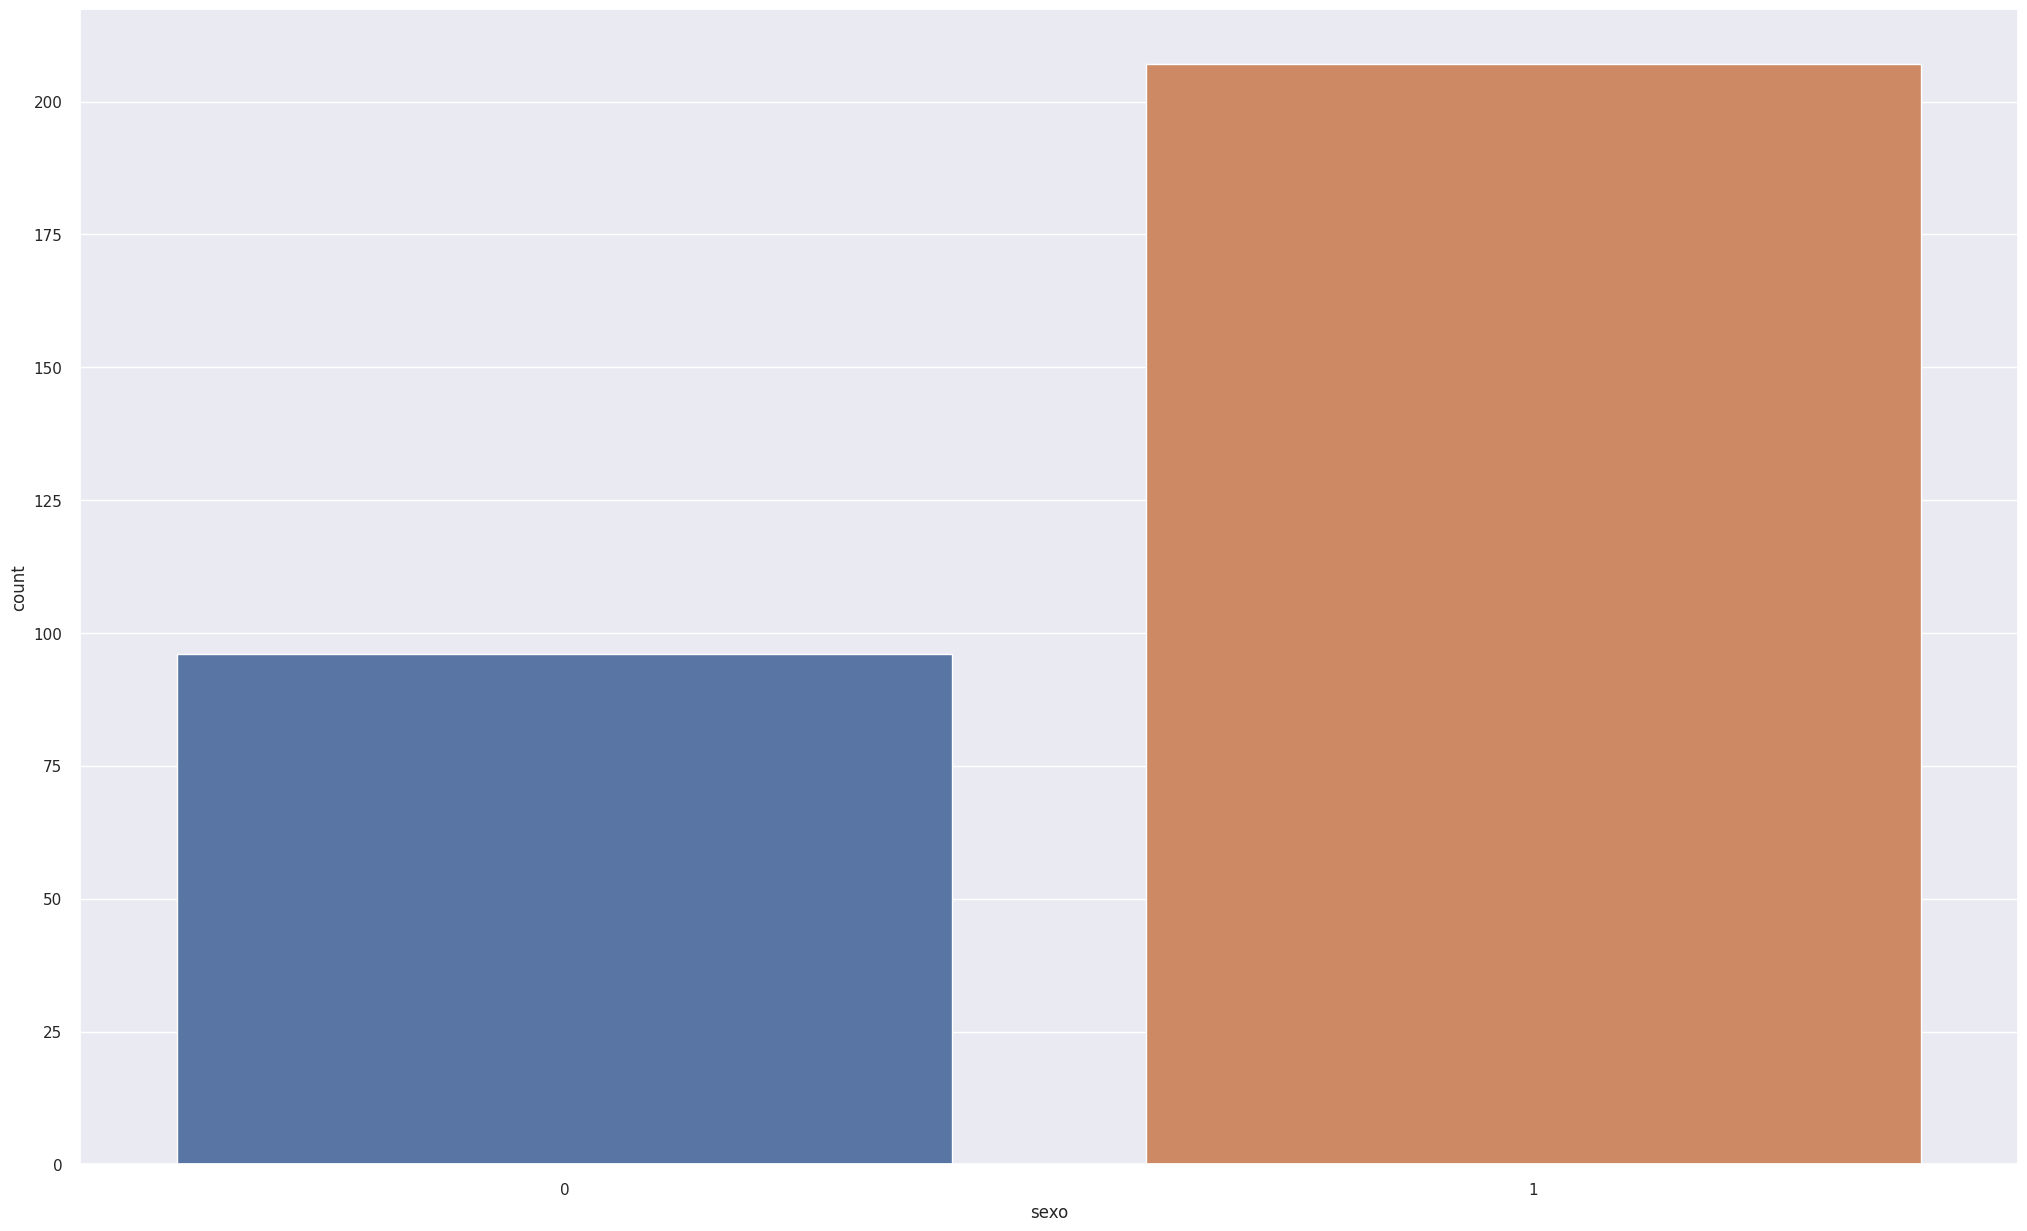

In [416]:
#Gráfico de barras tipo counterplot. sexo
# 1 = masculino; 0 = feminino
ax = sns.countplot(x=df['sexo'])

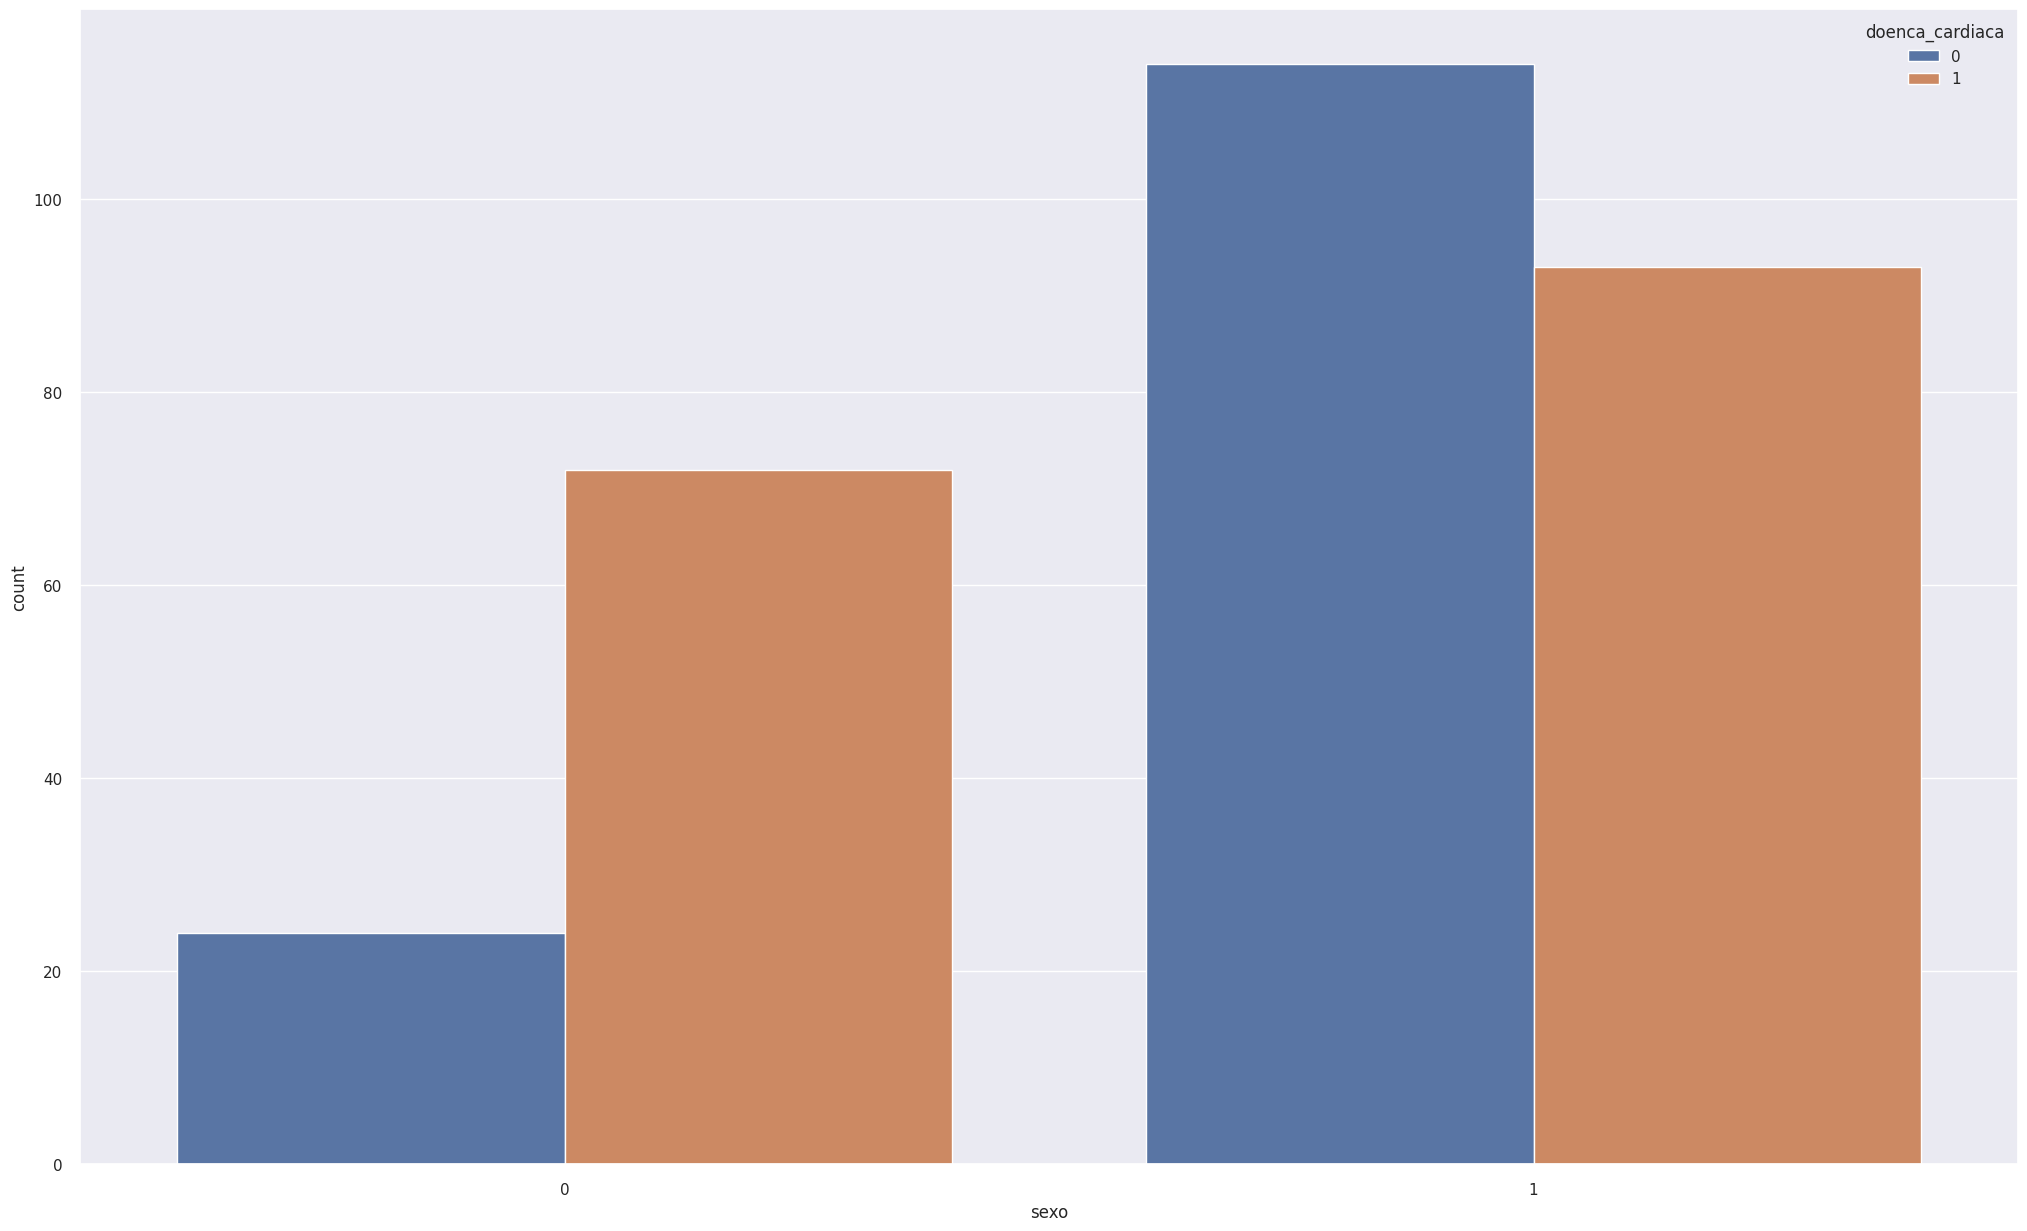

In [417]:
#Sexo x doença cardíaca, por 1 = masculino e 0 = feminino
ax = sns.countplot(data=df, x="sexo", hue="doenca_cardiaca")

In [418]:
#1 = masculino; 0 = feminino
df[['doenca_cardiaca', 'sexo']].groupby(['sexo']).mean()

,doenca_cardiaca
sexo,
0,0.750000
1,0.449275


In [419]:
# Agrupando a pressao arterial em repouso
group = df.groupby(['pressao_arterial_repouso']).size()
group

pressao_arterial_repouso
94      2
100     4
101     1
102     2
104     1
105     3
106     1
108     6
110    19
112     9
114     1
115     3
117     1
118     7
120    37
122     4
123     1
124     6
125    11
126     3
128    12
129     1
130    36
132     8
134     5
135     6
136     3
138    13
140    32
142     3
144     2
145     5
146     2
148     2
150    17
152     5
154     1
155     1
156     1
160    11
164     1
165     1
170     4
172     1
174     1
178     2
180     3
192     1
200     1
dtype: int64

In [420]:
#1 = masculino; 0 = feminino
df[['doenca_cardiaca', 'sexo']].groupby(['sexo']).mean()

,doenca_cardiaca
sexo,
0,0.750000
1,0.449275


In [421]:
#Obtedo os atributos apenas os númericos
#Discretos - Inteiros e Contínuos - Campos com vírgula 
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
df_numeric = df.select_dtypes(include=numerics)
df_numeric

,idade,sexo,tipo_dor_peito,pressao_arterial_repouso,colesterol,acucar_no_sangue_em_jejum,ecg_repouso,frequencia_cardiaca_maxima,angina_induzida_por_exercicio,depressao_st_induzida_por_exercicio,inclinacao_st_do_pico_do_exercicio,num_vasos_principais,talassemia,doenca_cardiaca
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


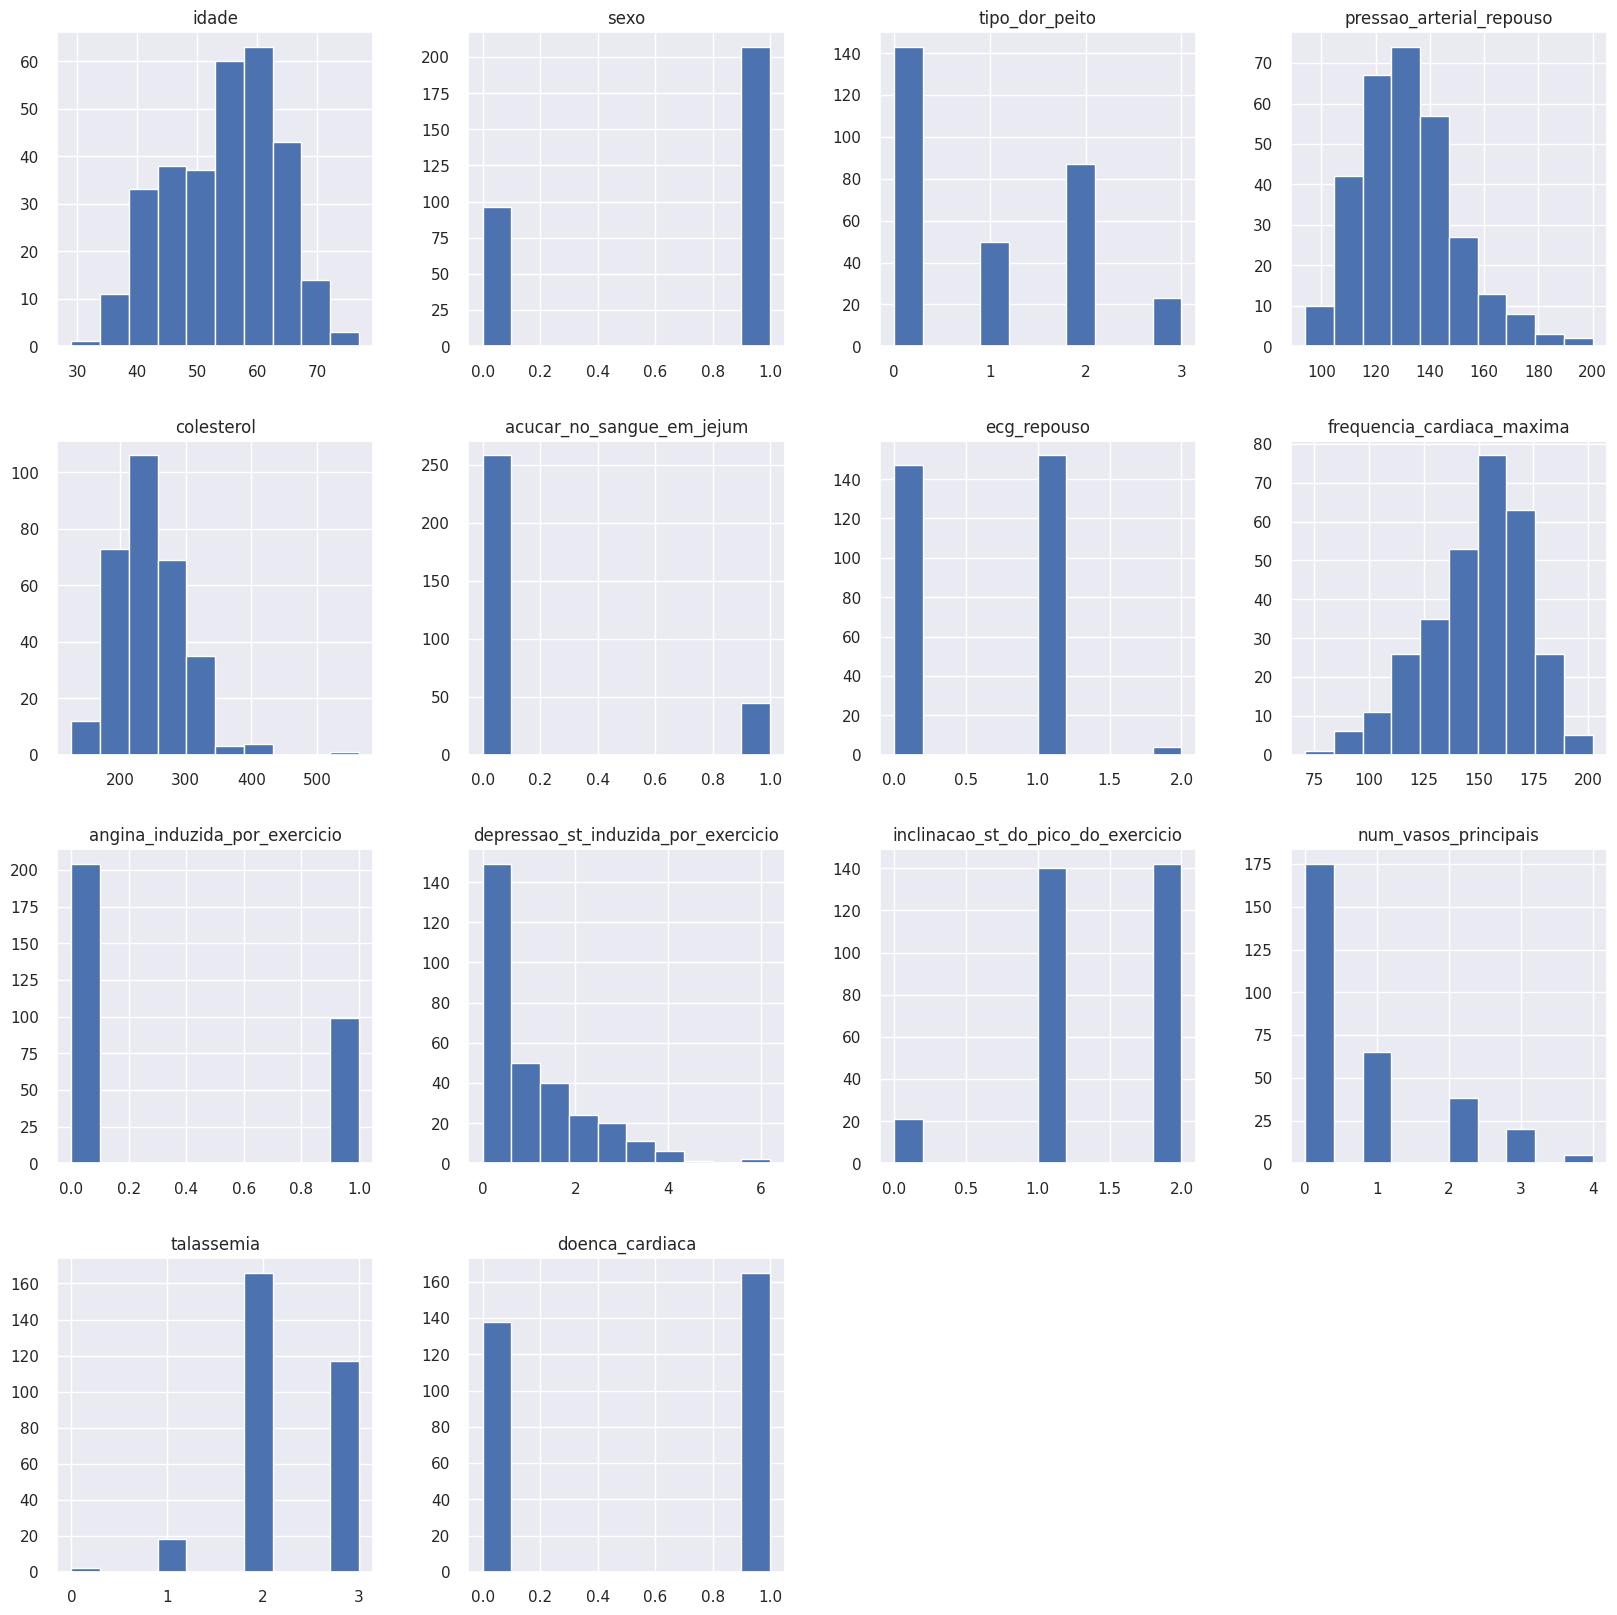

In [422]:
df.hist(figsize=(20,20))
plt.show()

<ipython-input-423-533ebd1dcc8f>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['idade']).set_title('Idade')


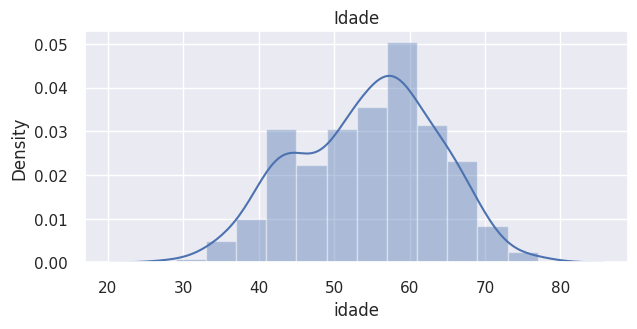

In [423]:
plt.figure(figsize=(7,3),dpi=100)
sns.distplot(df['idade']).set_title('Idade')
plt.show()

<ipython-input-424-32661d61216e>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['tipo_dor_peito']).set_title('tipo_dor_peito')


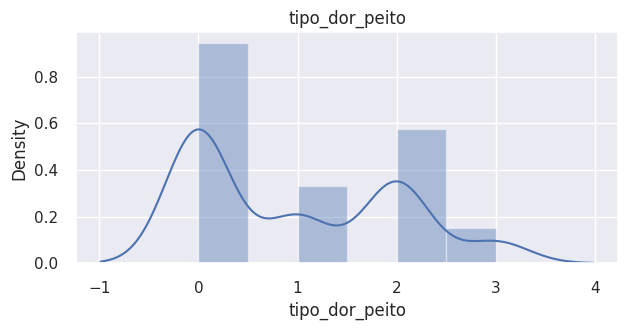

In [424]:
plt.figure(figsize=(7,3),dpi=100)
sns.distplot(df['tipo_dor_peito']).set_title('tipo_dor_peito')
plt.show()

<ipython-input-425-c98019c60760>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['pressao_arterial_repouso']).set_title('pressao_arterial_repouso')


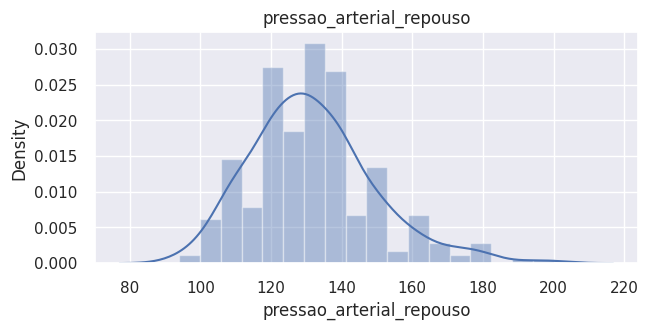

In [425]:
plt.figure(figsize=(7,3),dpi=100)
sns.distplot(df['pressao_arterial_repouso']).set_title('pressao_arterial_repouso')
plt.show()

<ipython-input-426-a1480eb0f4c9>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['colesterol']).set_title('colesterol')


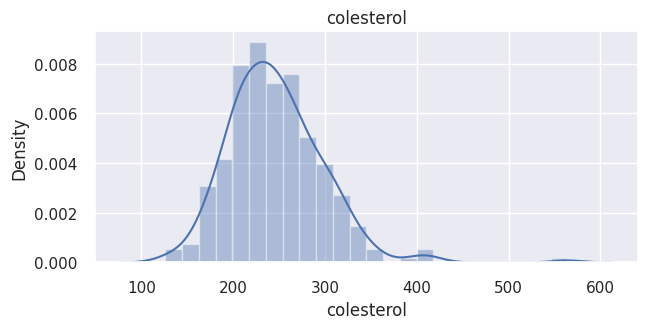

In [426]:
plt.figure(figsize=(7,3),dpi=100)
sns.distplot(df['colesterol']).set_title('colesterol')
plt.show()

<ipython-input-427-e69eaae91ecd>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['acucar_no_sangue_em_jejum']).set_title('acucar_no_sangue_em_jejum')


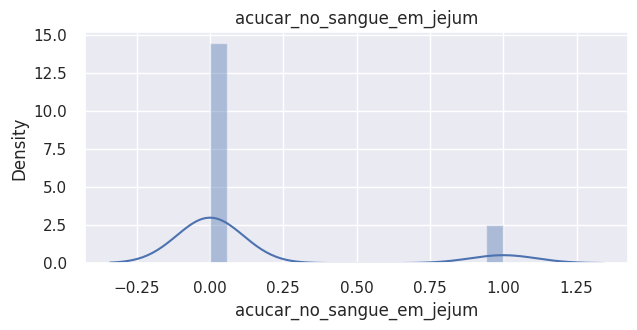

In [427]:
plt.figure(figsize=(7,3),dpi=100)
sns.distplot(df['acucar_no_sangue_em_jejum']).set_title('acucar_no_sangue_em_jejum')
plt.show()

<ipython-input-428-e69913da4f1e>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['ecg_repouso']).set_title('ecg_repouso')


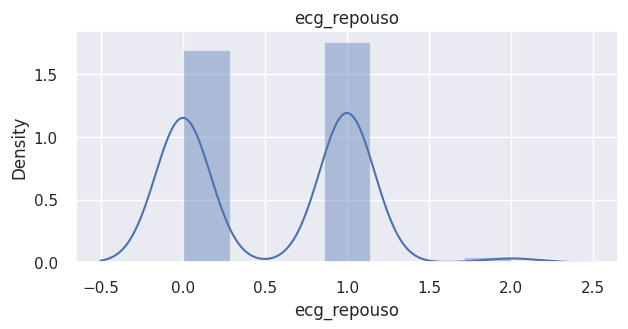

In [428]:
plt.figure(figsize=(7,3),dpi=100)
sns.distplot(df['ecg_repouso']).set_title('ecg_repouso')
plt.show()

<ipython-input-429-1a935fd03d7a>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['frequencia_cardiaca_maxima']).set_title('frequencia_cardiaca_maxima')


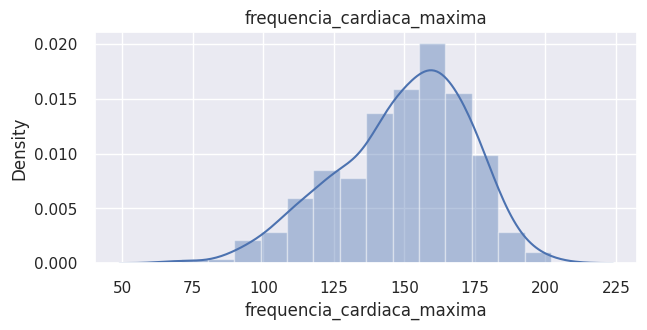

In [429]:
plt.figure(figsize=(7,3),dpi=100)
sns.distplot(df['frequencia_cardiaca_maxima']).set_title('frequencia_cardiaca_maxima')
plt.show()

<ipython-input-430-e858a34dc8ed>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['angina_induzida_por_exercicio']).set_title('angina_induzida_por_exercicio')


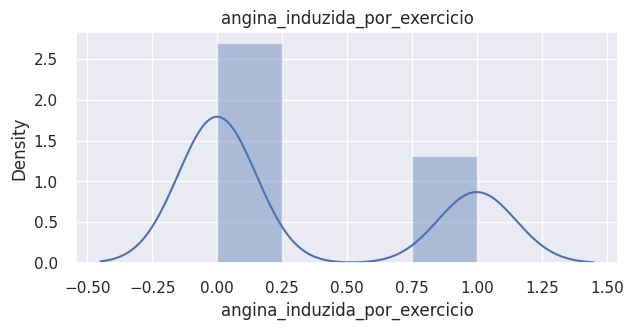

In [430]:
plt.figure(figsize=(7,3),dpi=100)
sns.distplot(df['angina_induzida_por_exercicio']).set_title('angina_induzida_por_exercicio')
plt.show()

<ipython-input-431-37e7f2b983c0>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['depressao_st_induzida_por_exercicio']).set_title('depressao_st_induzida_por_exercicio')


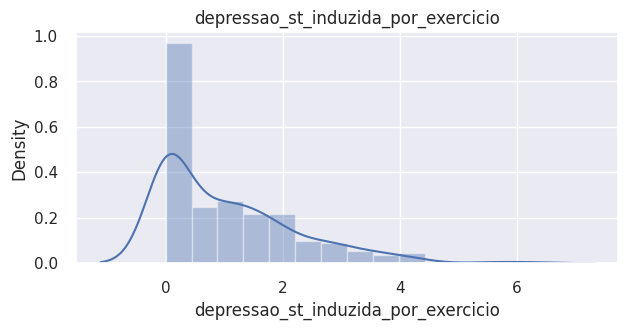

In [431]:
plt.figure(figsize=(7,3),dpi=100)
sns.distplot(df['depressao_st_induzida_por_exercicio']).set_title('depressao_st_induzida_por_exercicio')
plt.show()

<ipython-input-432-96f4cbed91df>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['inclinacao_st_do_pico_do_exercicio']).set_title('inclinacao_st_do_pico_do_exercicio')


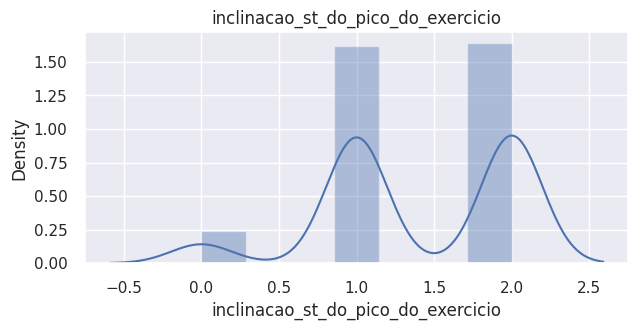

In [432]:
plt.figure(figsize=(7,3),dpi=100)
sns.distplot(df['inclinacao_st_do_pico_do_exercicio']).set_title('inclinacao_st_do_pico_do_exercicio')
plt.show()

<ipython-input-433-5dbae04da1ae>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['num_vasos_principais']).set_title('num_vasos_principais')


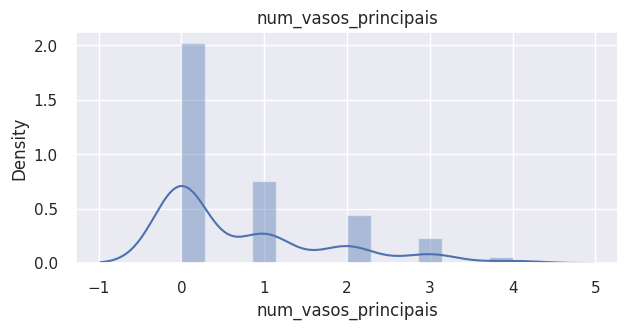

In [433]:
plt.figure(figsize=(7,3),dpi=100)
sns.distplot(df['num_vasos_principais']).set_title('num_vasos_principais')
plt.show()

<ipython-input-434-0c81ad3e0e92>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['talassemia']).set_title('talassemia')


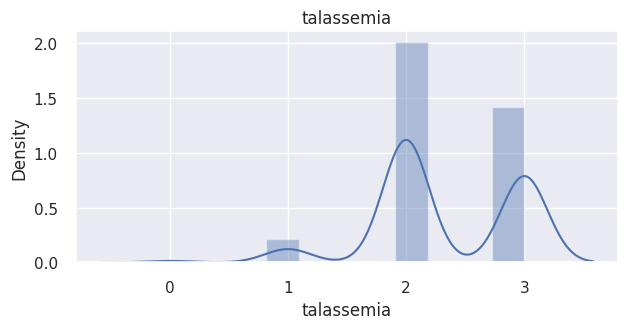

In [434]:
plt.figure(figsize=(7,3),dpi=100)
sns.distplot(df['talassemia']).set_title('talassemia')
plt.show()

<ipython-input-435-6eebfd81f215>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['doenca_cardiaca']).set_title('doenca_cardiaca')


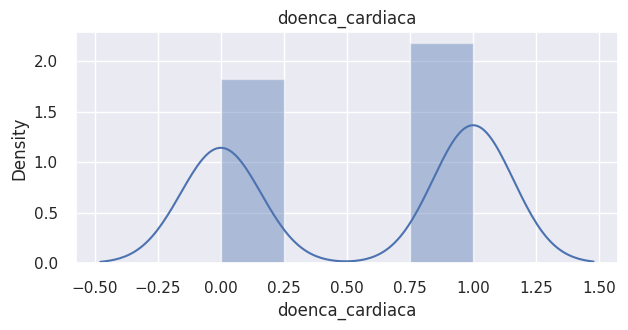

In [435]:
plt.figure(figsize=(7,3),dpi=100)
sns.distplot(df['doenca_cardiaca']).set_title('doenca_cardiaca')
plt.show()

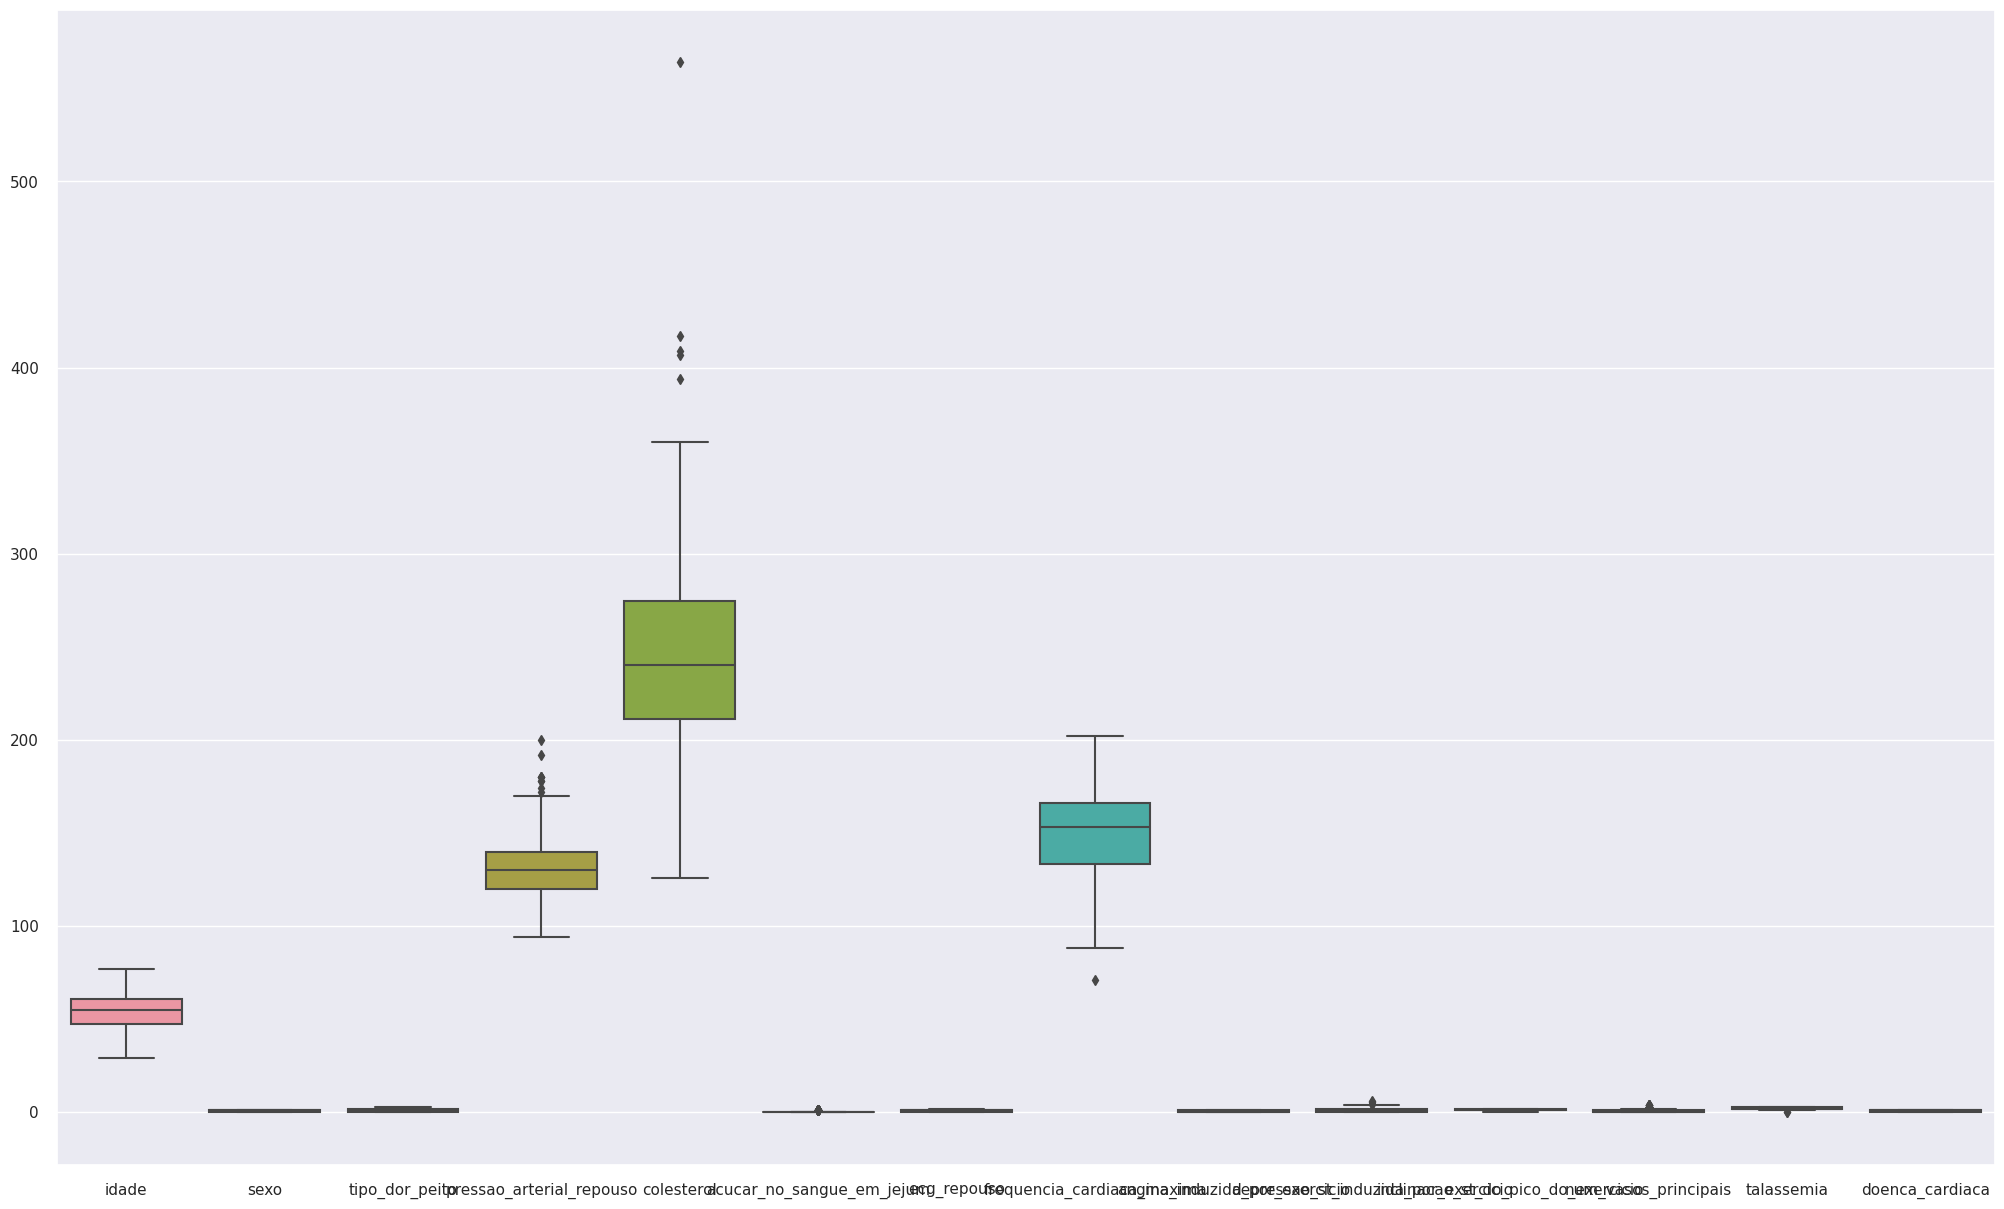

In [436]:
#boxplot = df_numeric.boxplot(grid=True,figsize=(10,5))
sns.set(rc={'figure.figsize': (25, 15)}) 
ax = sns.boxplot(data=df_numeric)

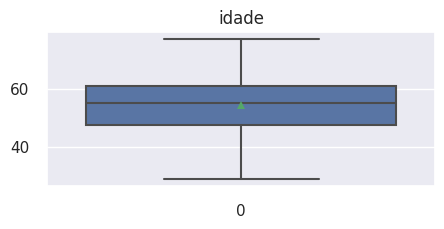

In [437]:
#Vamos fazer um a um idade
plt.figure(figsize=(5,2),dpi=100)
ax = sns.boxplot(df['idade'],showmeans=True).set_title('idade')

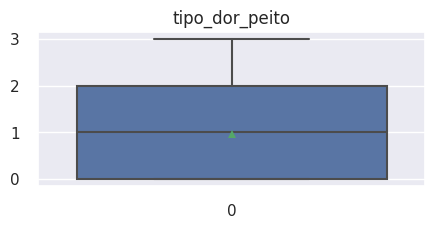

In [438]:
#Vamos fazer um a um tipo de dor no peito
plt.figure(figsize=(5,2),dpi=100)
ax = sns.boxplot(df['tipo_dor_peito'],showmeans=True).set_title('tipo_dor_peito')

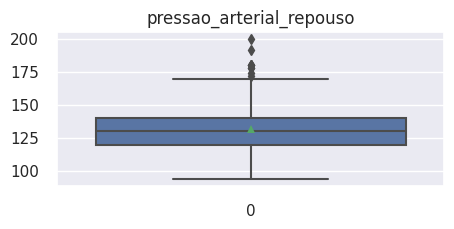

In [439]:
#Vamos fazer um a um ipressao arterial em repouso
plt.figure(figsize=(5,2),dpi=100)
ax = sns.boxplot(df['pressao_arterial_repouso'],showmeans=True).set_title('pressao_arterial_repouso')

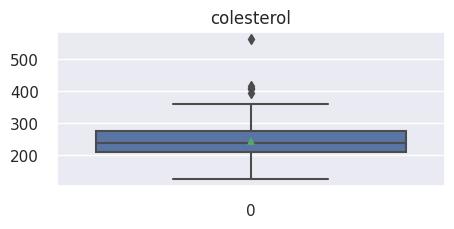

In [440]:
#Vamos fazer um a um colesterol
plt.figure(figsize=(5,2),dpi=100)
ax = sns.boxplot(df['colesterol'],showmeans=True).set_title('colesterol')

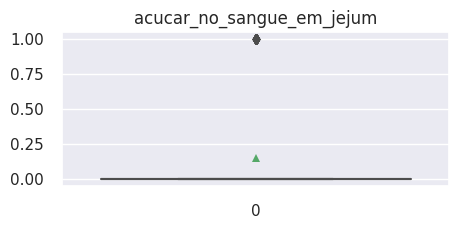

In [441]:
#Vamos fazer um a um açucar no sangue em jejum
plt.figure(figsize=(5,2),dpi=100)
ax = sns.boxplot(df['acucar_no_sangue_em_jejum'],showmeans=True).set_title('acucar_no_sangue_em_jejum')

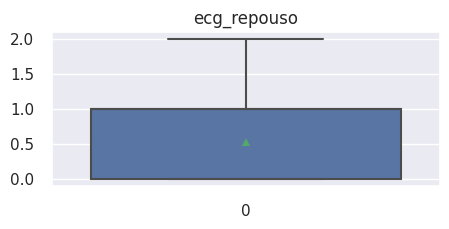

In [442]:
#Vamos fazer um a um ecg em repouso
plt.figure(figsize=(5,2),dpi=100)
ax = sns.boxplot(df['ecg_repouso'],showmeans=True).set_title('ecg_repouso')

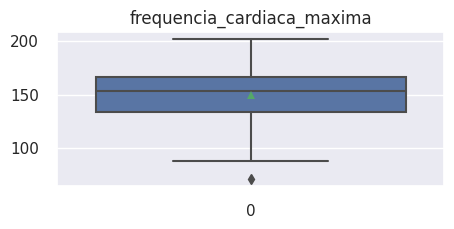

In [443]:
#Vamos fazer um a um frequencia cardiaca maxima
plt.figure(figsize=(5,2),dpi=100)
ax = sns.boxplot(df['frequencia_cardiaca_maxima'],showmeans=True).set_title('frequencia_cardiaca_maxima')

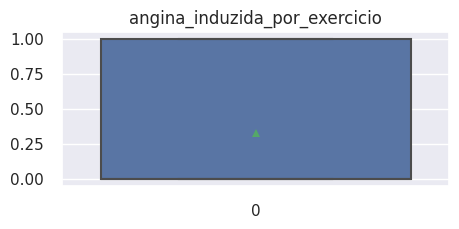

In [444]:
#Vamos fazer um a um angina induzida por exercicio
plt.figure(figsize=(5,2),dpi=100)
ax = sns.boxplot(df['angina_induzida_por_exercicio'],showmeans=True).set_title('angina_induzida_por_exercicio')

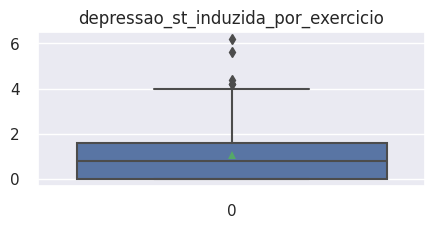

In [445]:
#Vamos fazer um a um depressao st induzida por exercicio
plt.figure(figsize=(5,2),dpi=100)
ax = sns.boxplot(df['depressao_st_induzida_por_exercicio'],showmeans=True).set_title('depressao_st_induzida_por_exercicio')

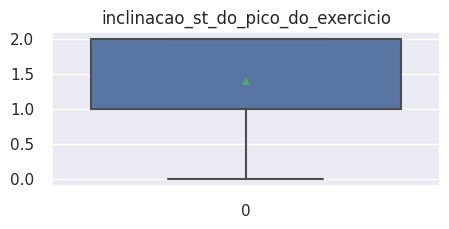

In [446]:
#Vamos fazer um a um inclinacao st do pico do exercicio
plt.figure(figsize=(5,2),dpi=100)
ax = sns.boxplot(df['inclinacao_st_do_pico_do_exercicio'],showmeans=True).set_title('inclinacao_st_do_pico_do_exercicio')

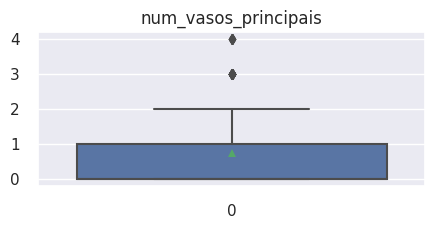

In [447]:
#Vamos fazer um a um numero de vasos principais
plt.figure(figsize=(5,2),dpi=100)
ax = sns.boxplot(df['num_vasos_principais'],showmeans=True).set_title('num_vasos_principais')

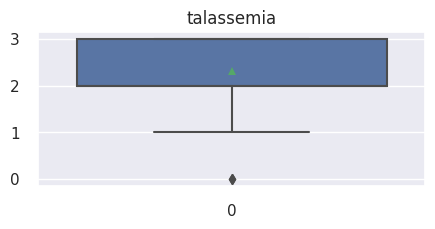

In [448]:
#Vamos fazer um a um talassemia
plt.figure(figsize=(5,2),dpi=100)
ax = sns.boxplot(df['talassemia'],showmeans=True).set_title('talassemia')

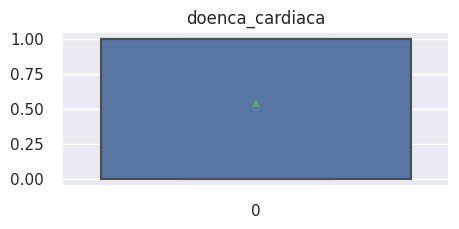

In [449]:
#Vamos fazer um a um doenca cardiaca
plt.figure(figsize=(5,2),dpi=100)
ax = sns.boxplot(df['doenca_cardiaca'],showmeans=True).set_title('doenca_cardiaca')

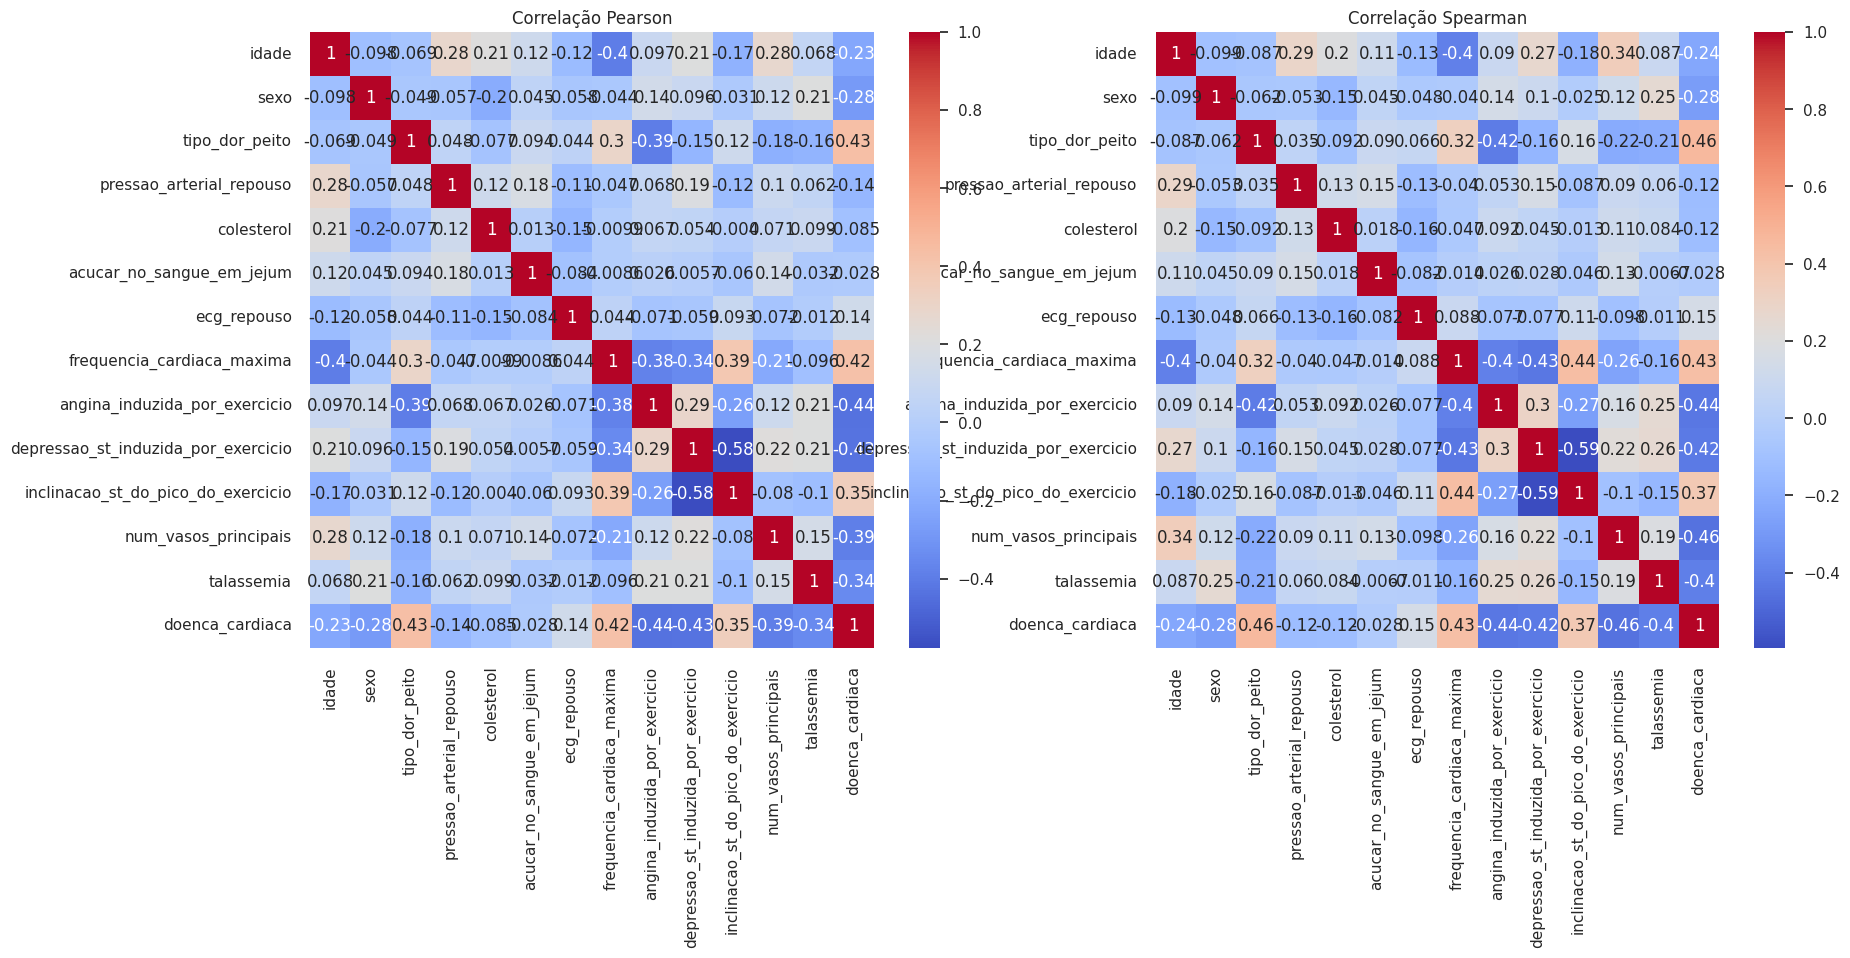

In [450]:
# Correlação Pearson e Spearman
fig, ax = plt.subplots(1,2,figsize=(20,8))
g = sns.heatmap(df.corr(method='pearson'), cmap='coolwarm', annot=True, ax=ax[0])
g.set_title('Correlação Pearson')
g2 = sns.heatmap(df.corr(method='spearman'), cmap='coolwarm', annot=True, ax=ax[1])
g2.set_title('Correlação Spearman');

<Axes: xlabel='frequencia_cardiaca_maxima', ylabel='tipo_dor_peito'>

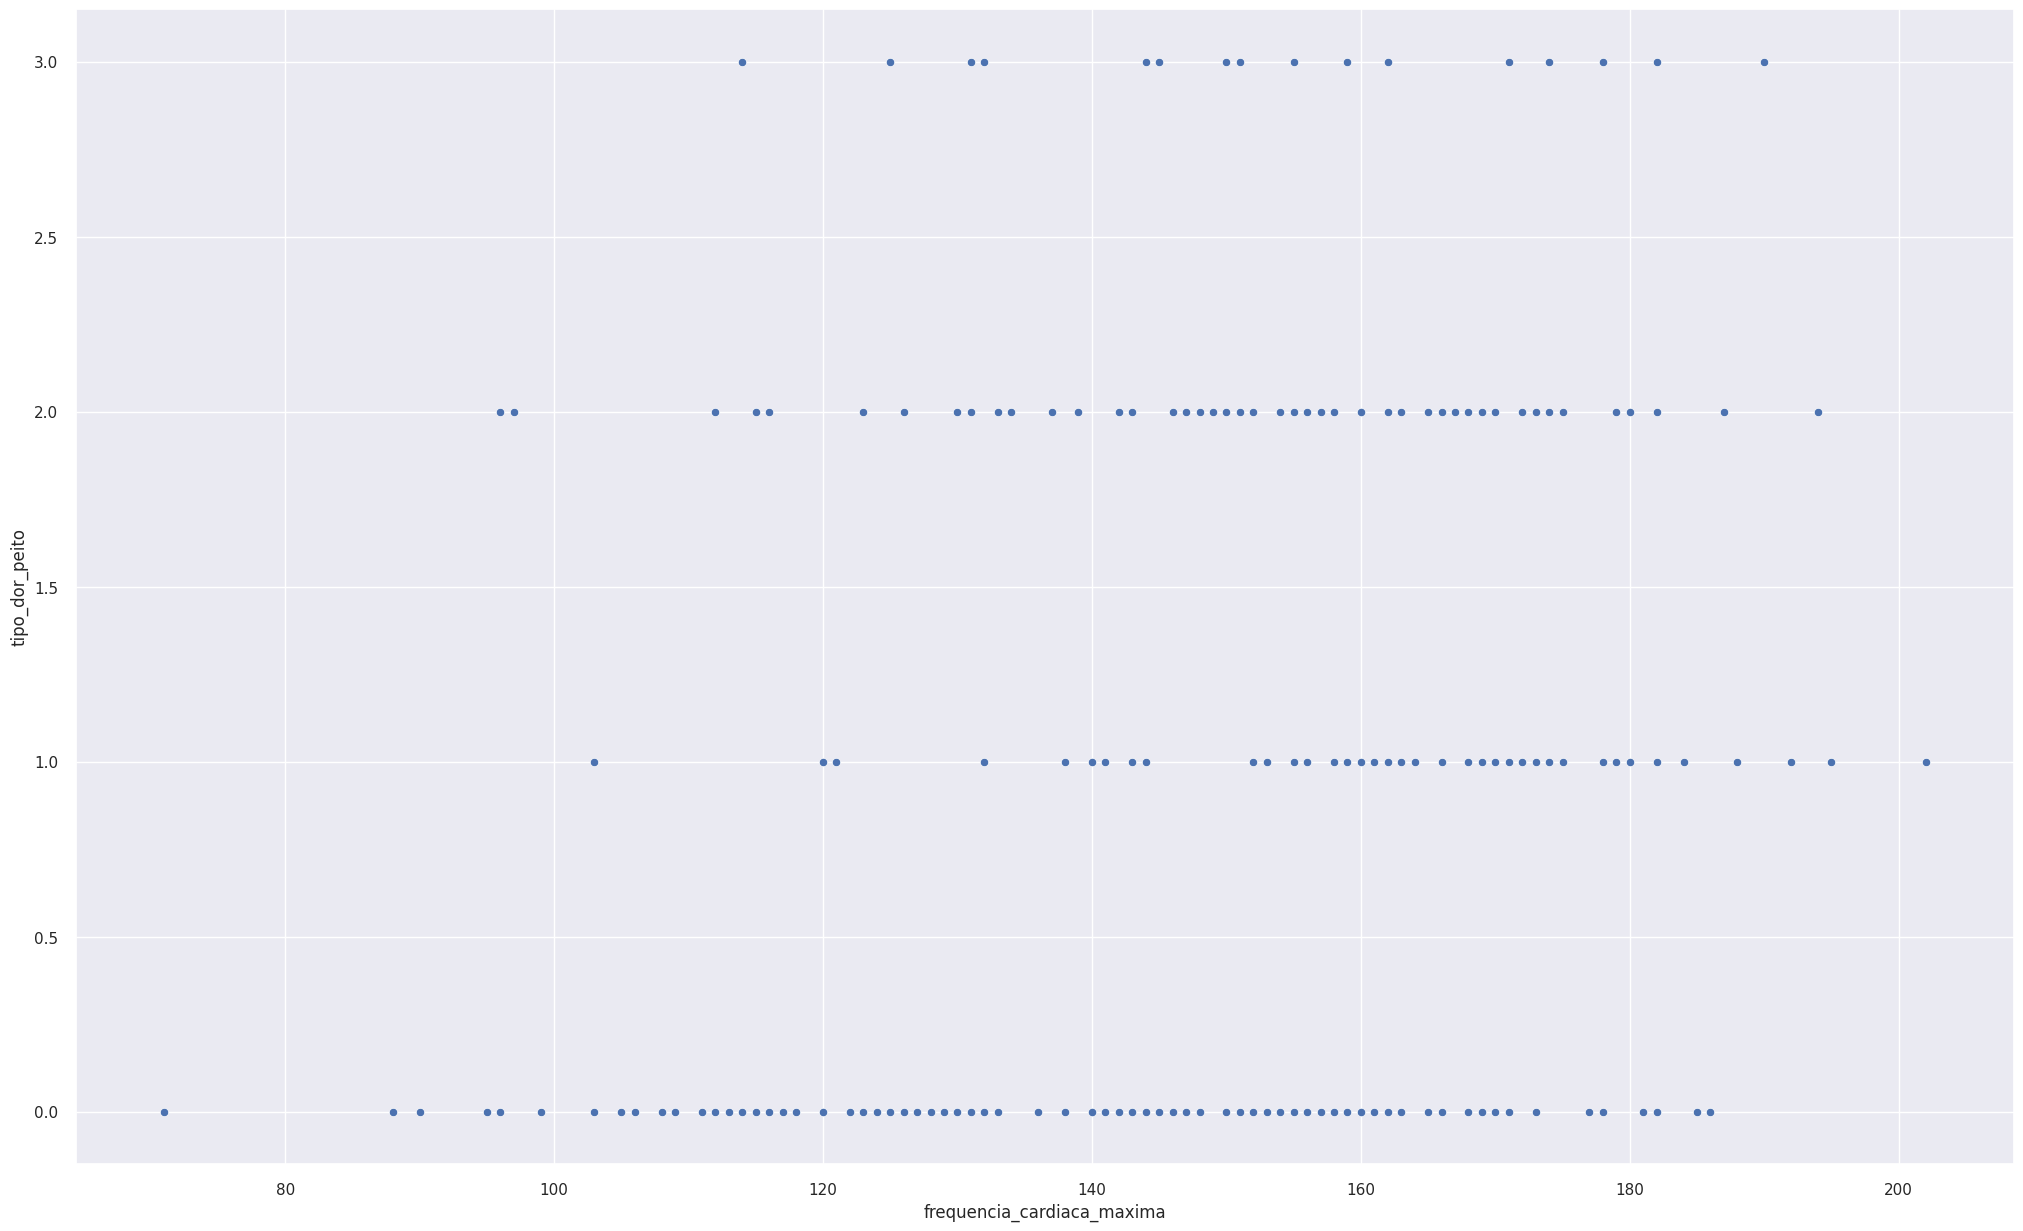

In [451]:
sns.scatterplot(x='frequencia_cardiaca_maxima', y='tipo_dor_peito', data=df)

<Axes: xlabel='frequencia_cardiaca_maxima', ylabel='tipo_dor_peito'>

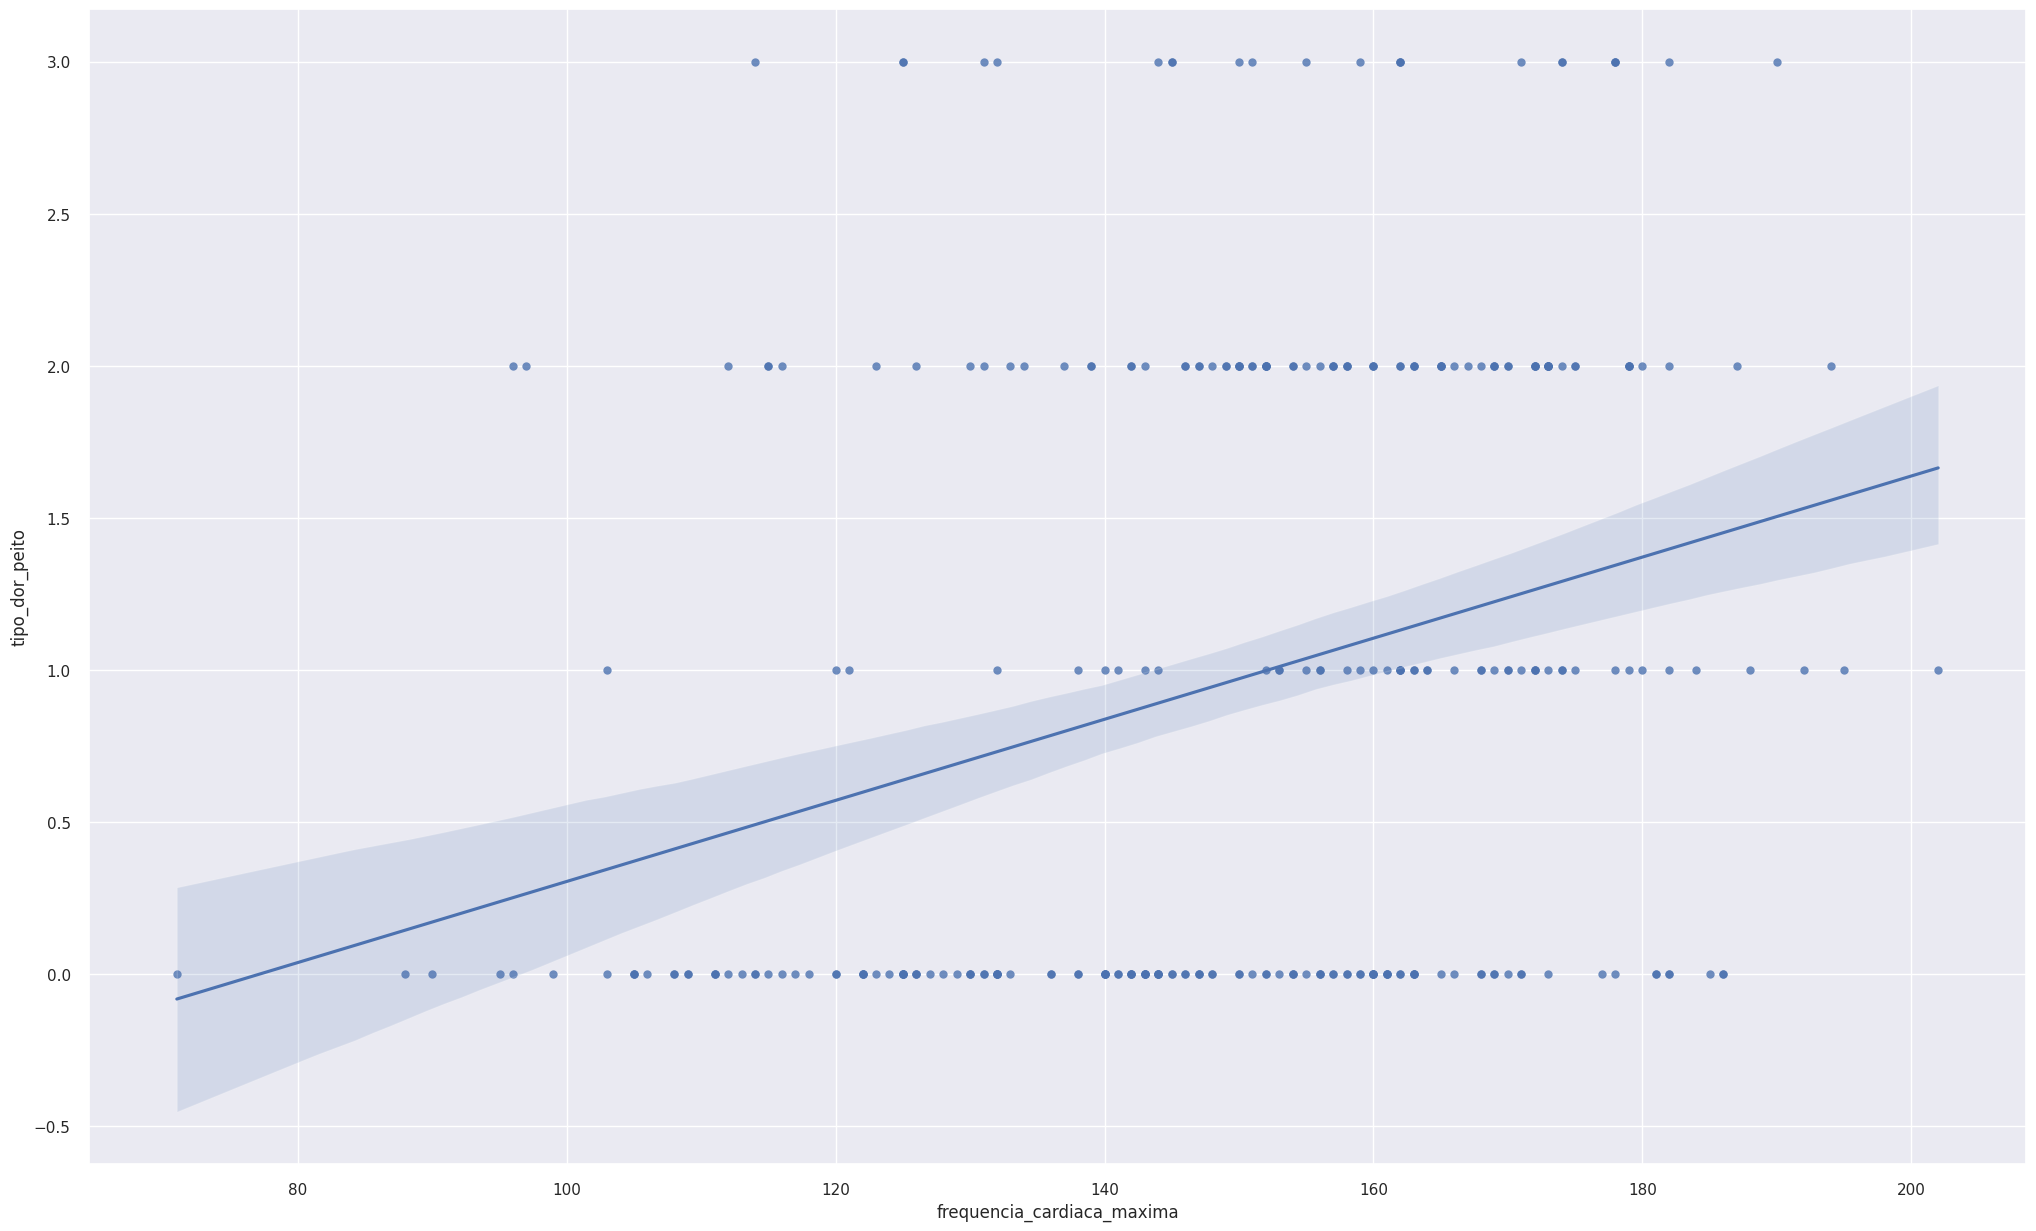

In [452]:
sns.regplot(x='frequencia_cardiaca_maxima', y='tipo_dor_peito', data=df)

<Axes: xlabel='inclinacao_st_do_pico_do_exercicio', ylabel='doenca_cardiaca'>

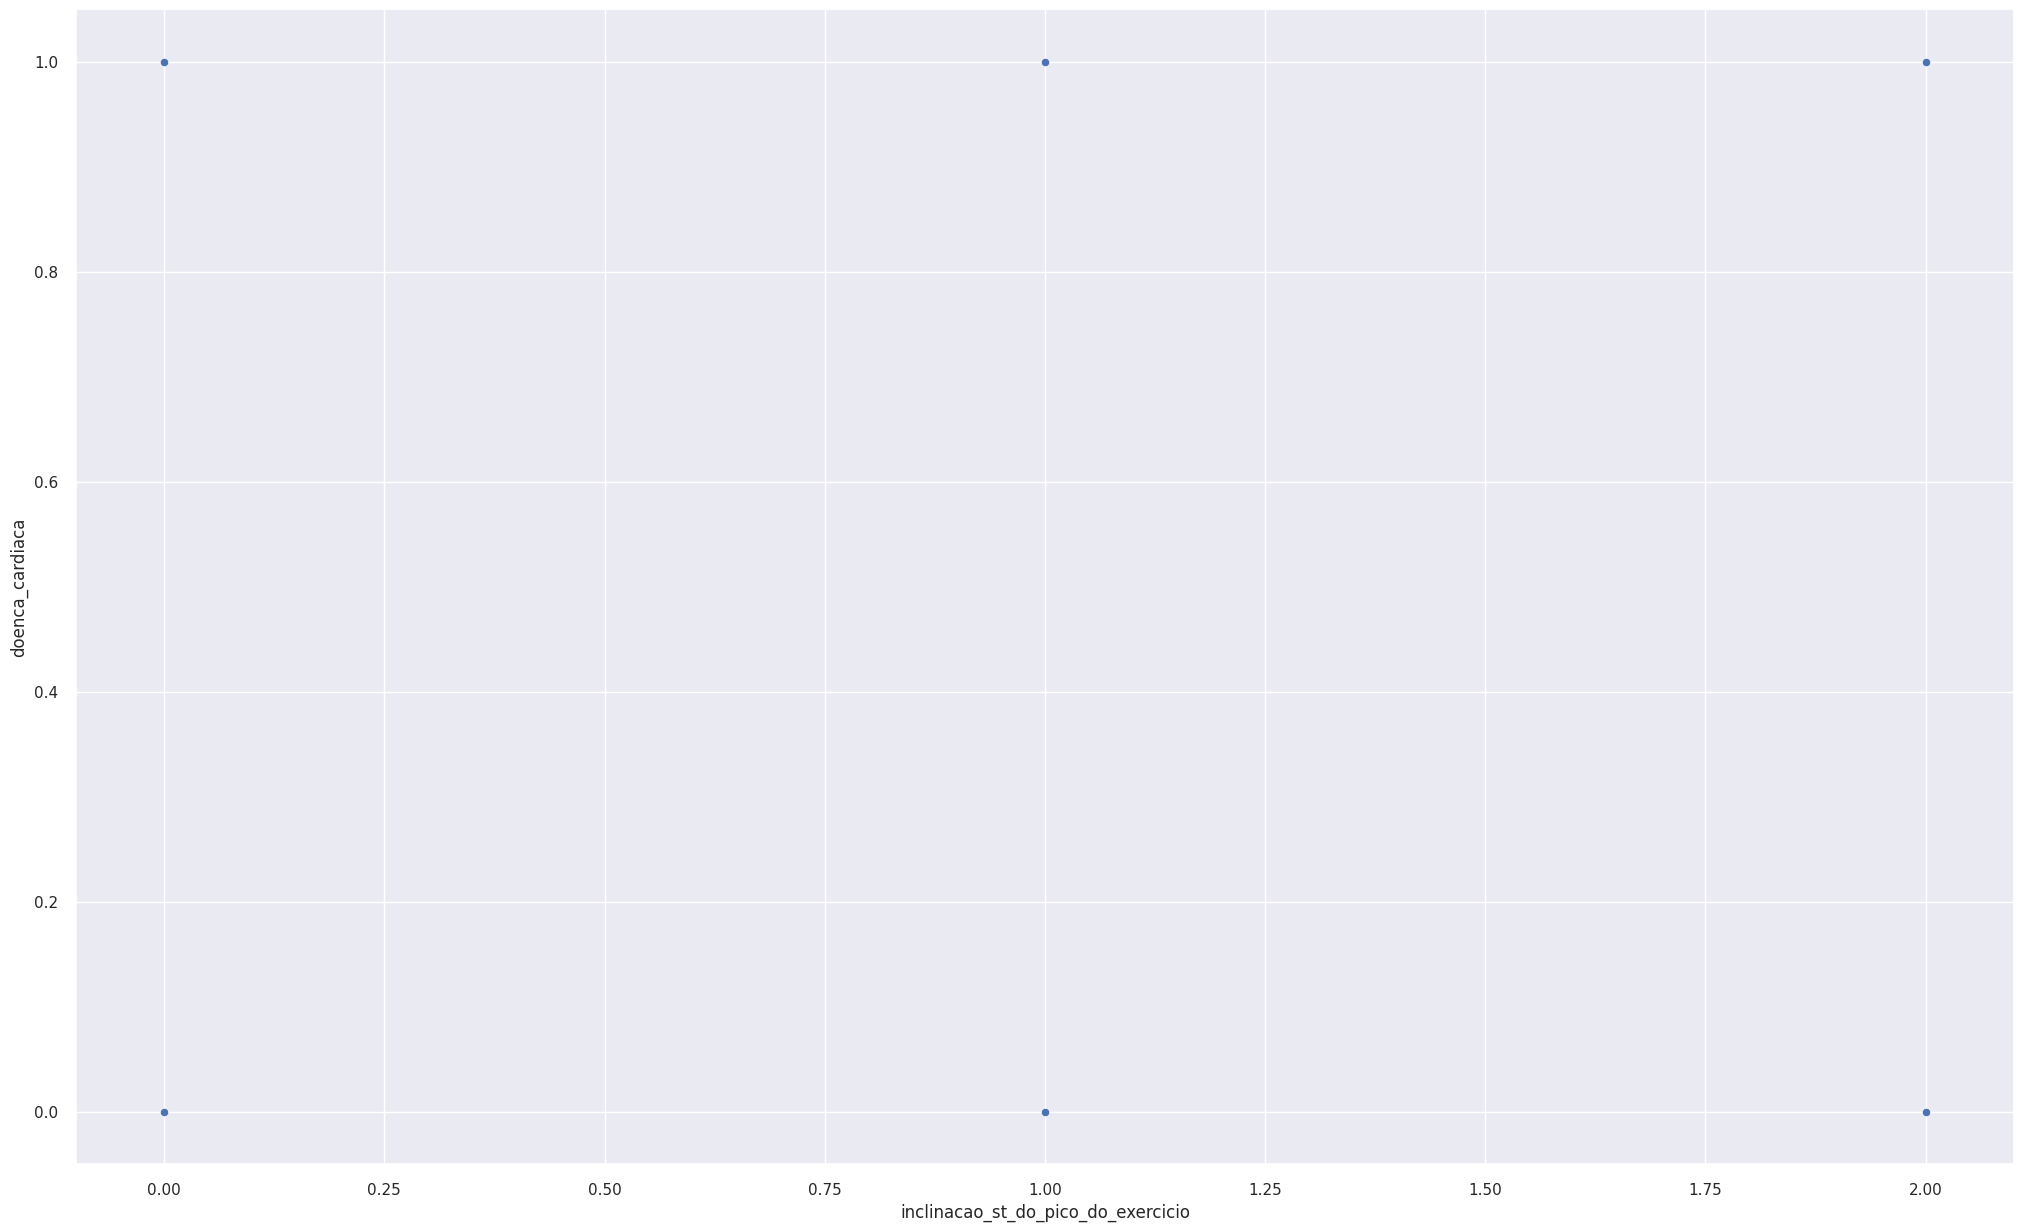

In [453]:
sns.scatterplot(x='inclinacao_st_do_pico_do_exercicio', y='doenca_cardiaca', data=df)


<Axes: xlabel='inclinacao_st_do_pico_do_exercicio', ylabel='doenca_cardiaca'>

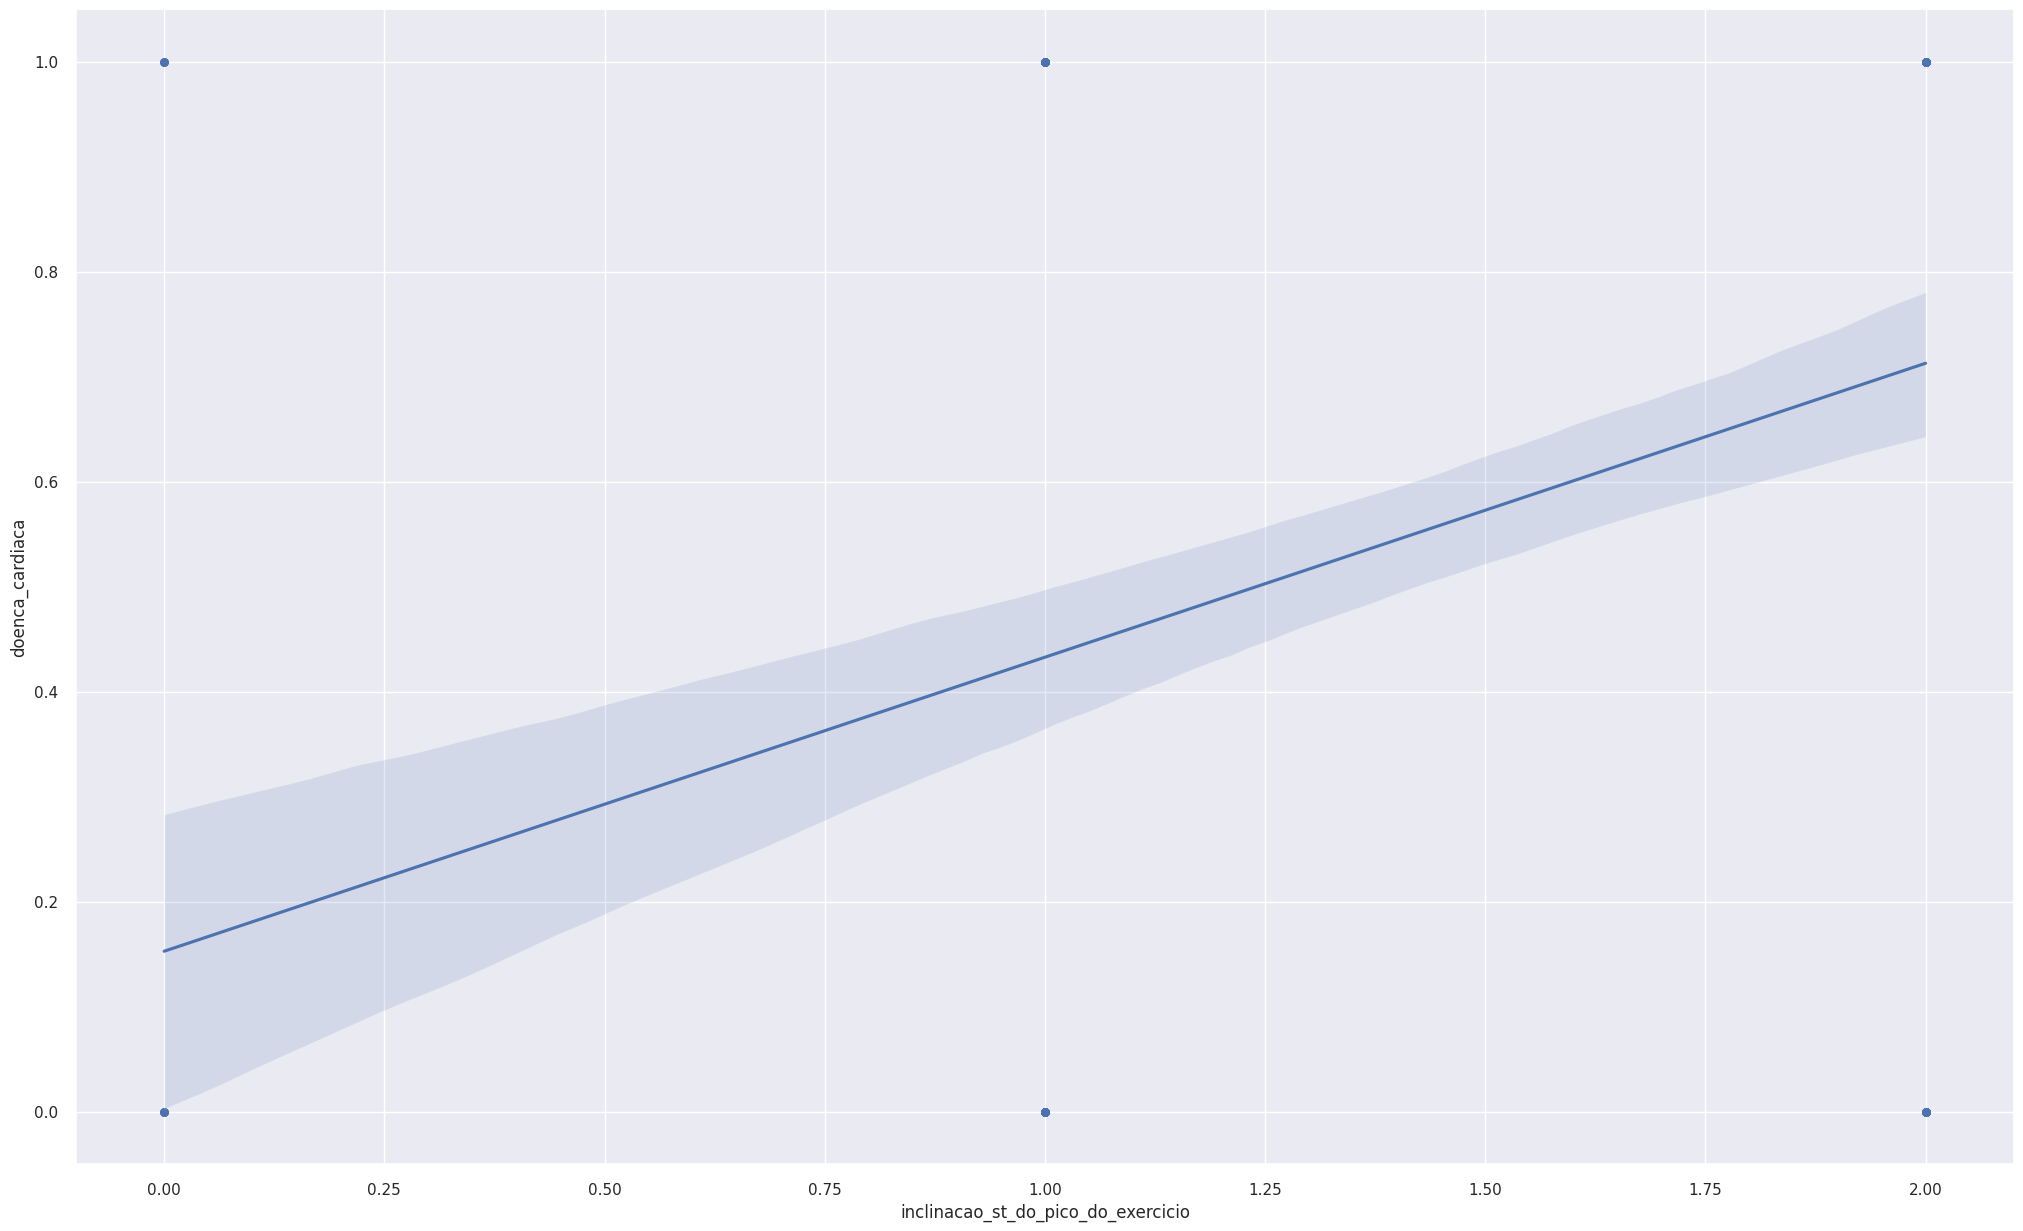

In [454]:
sns.regplot(x='inclinacao_st_do_pico_do_exercicio', y='doenca_cardiaca', data=df)

<Axes: xlabel='frequencia_cardiaca_maxima', ylabel='tipo_dor_peito'>

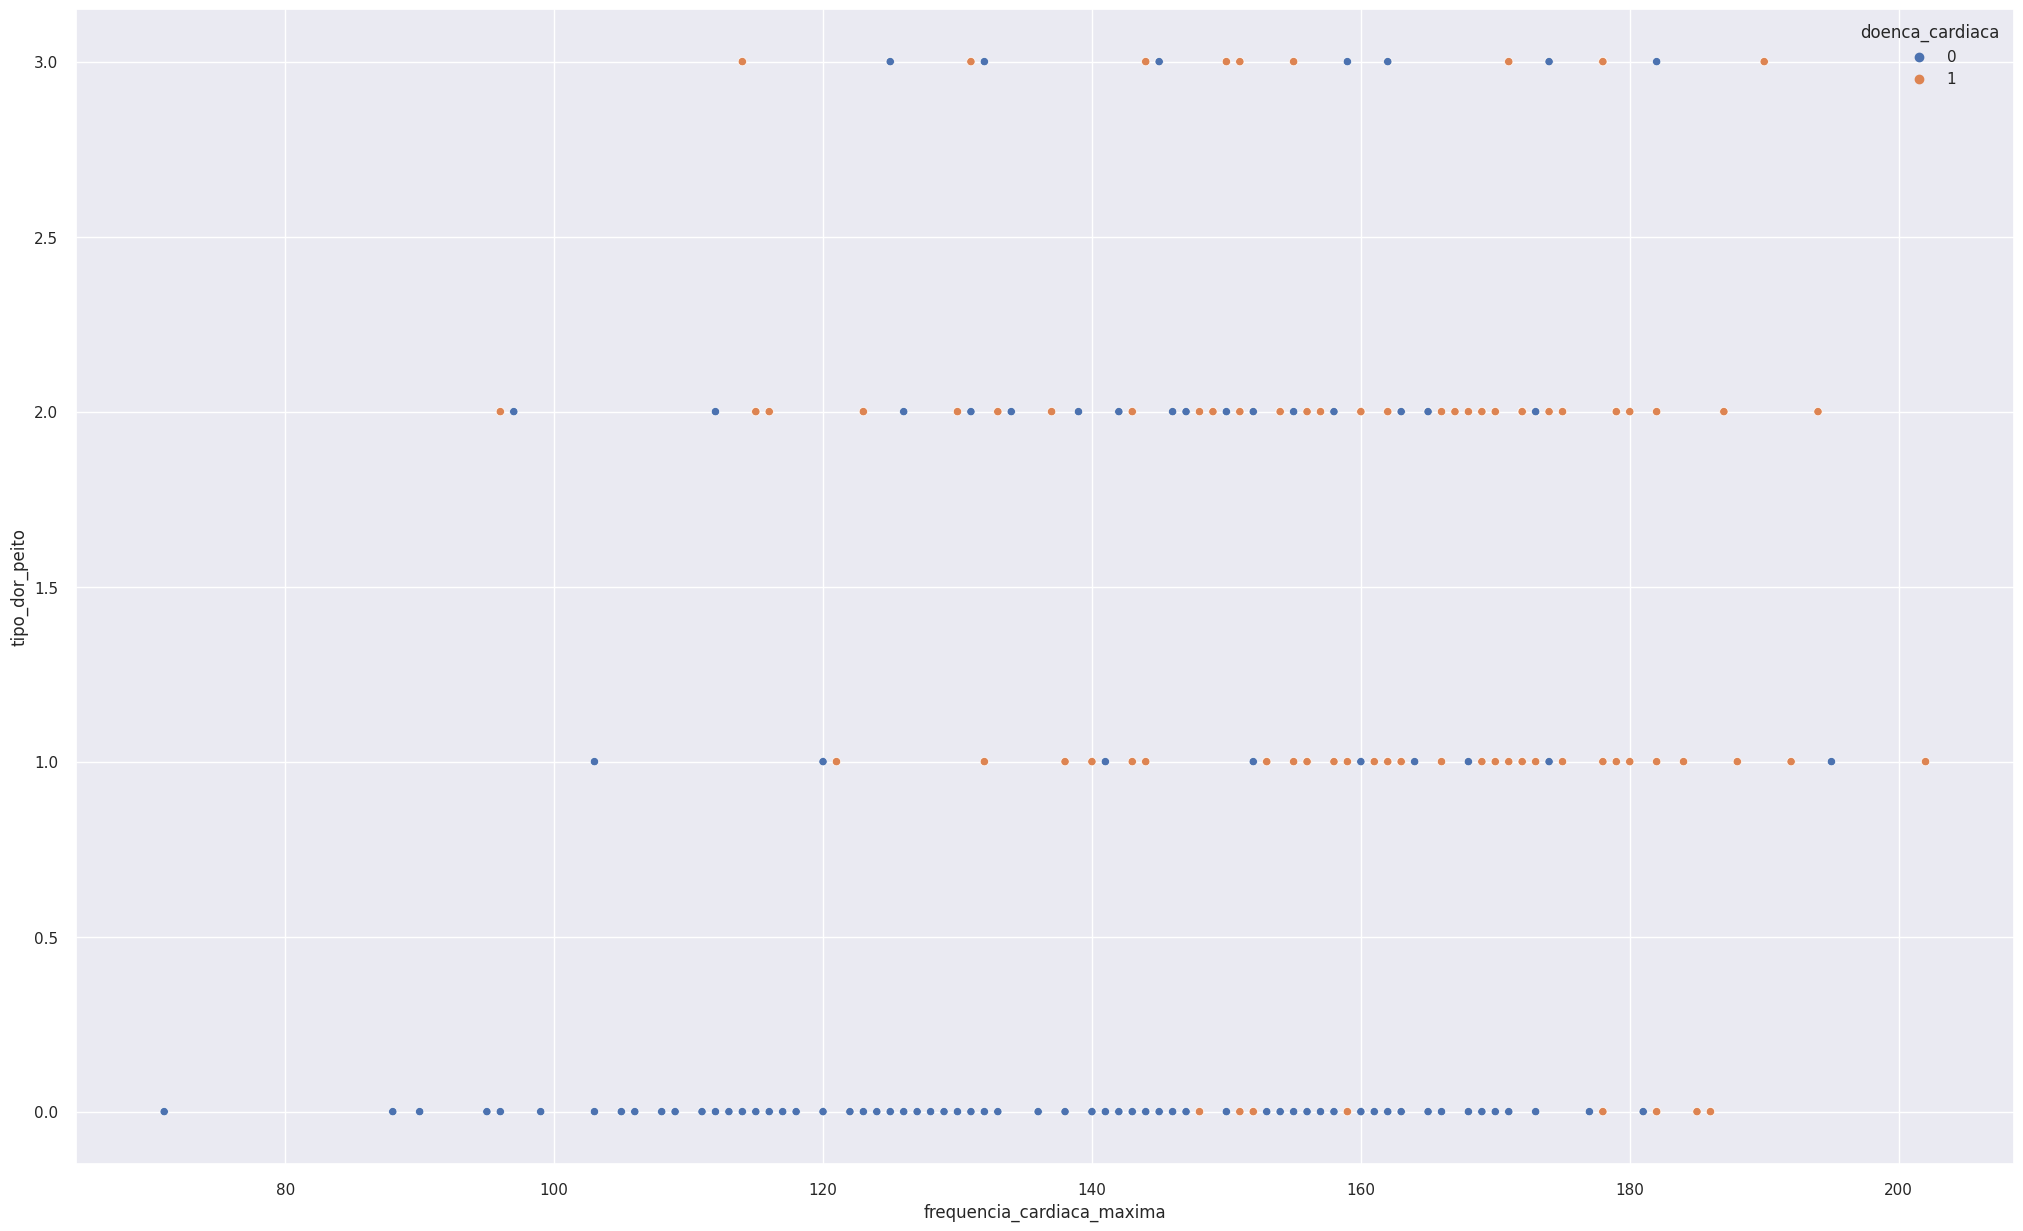

In [455]:
sns.scatterplot(x='frequencia_cardiaca_maxima', y='tipo_dor_peito', hue='doenca_cardiaca', data=df)

**Corrigir outliers**

In [456]:
df1 = df.copy()

In [457]:
##outliers em pressao arterial em repouso, vamos considerar 2 desvios padrão
media =sts.mean(df1['pressao_arterial_repouso'])
desv = sts.stdev(df1['pressao_arterial_repouso'])
print(media)
print(desv)

131.62376237623764
17.538142813517098


In [458]:
df1.loc[df1['pressao_arterial_repouso'] <  media - 2 * desv] 

,idade,sexo,tipo_dor_peito,pressao_arterial_repouso,colesterol,acucar_no_sangue_em_jejum,ecg_repouso,frequencia_cardiaca_maxima,angina_induzida_por_exercicio,depressao_st_induzida_por_exercicio,inclinacao_st_do_pico_do_exercicio,num_vasos_principais,talassemia,doenca_cardiaca
71,51,1,2,94,227,0,1,154,1,0.0,2,1,3,1
124,39,0,2,94,199,0,1,179,0,0.0,2,0,2,1


In [459]:
mediana = sts.median(df1['pressao_arterial_repouso'])
df1.loc[df1['pressao_arterial_repouso'] < media -  2 * desv, 'pressao_arterial_repouso'] = mediana

In [460]:
df1.loc[df1['pressao_arterial_repouso'] <  media - 2 * desv] 

,idade,sexo,tipo_dor_peito,pressao_arterial_repouso,colesterol,acucar_no_sangue_em_jejum,ecg_repouso,frequencia_cardiaca_maxima,angina_induzida_por_exercicio,depressao_st_induzida_por_exercicio,inclinacao_st_do_pico_do_exercicio,num_vasos_principais,talassemia,doenca_cardiaca


In [461]:
df1.loc[df1['pressao_arterial_repouso'] > media +  2 * desv] 

,idade,sexo,tipo_dor_peito,pressao_arterial_repouso,colesterol,acucar_no_sangue_em_jejum,ecg_repouso,frequencia_cardiaca_maxima,angina_induzida_por_exercicio,depressao_st_induzida_por_exercicio,inclinacao_st_do_pico_do_exercicio,num_vasos_principais,talassemia,doenca_cardiaca
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
101,59,1,3,178,270,0,0,145,0,4.2,0,0,3,1
110,64,0,0,180,325,0,1,154,1,0.0,2,0,2,1
152,64,1,3,170,227,0,0,155,0,0.6,1,0,3,1
195,59,1,0,170,326,0,0,140,1,3.4,0,0,3,0
203,68,1,2,180,274,1,0,150,1,1.6,1,0,3,0
223,56,0,0,200,288,1,0,133,1,4.0,0,2,3,0
228,59,1,3,170,288,0,0,159,0,0.2,1,0,3,0
241,59,0,0,174,249,0,1,143,1,0.0,1,0,2,0
248,54,1,1,192,283,0,0,195,0,0.0,2,1,3,0


In [462]:
mediana = sts.median(df1['pressao_arterial_repouso'])
df1.loc[df1['pressao_arterial_repouso'] > media +  2 * desv, 'pressao_arterial_repouso'] = mediana

In [463]:
df1.loc[df1['pressao_arterial_repouso'] > media +  2 * desv ] 

,idade,sexo,tipo_dor_peito,pressao_arterial_repouso,colesterol,acucar_no_sangue_em_jejum,ecg_repouso,frequencia_cardiaca_maxima,angina_induzida_por_exercicio,depressao_st_induzida_por_exercicio,inclinacao_st_do_pico_do_exercicio,num_vasos_principais,talassemia,doenca_cardiaca


In [464]:
##outliers em colesterol, vamos considerar 2 desvios padrão
media =sts.mean(df1['colesterol'])
desv = sts.stdev(df1['colesterol'])
print(media)
print(desv)

246.26402640264027
51.83075098793004


In [465]:
df1.loc[df1['colesterol'] <  media - 2 * desv] 

,idade,sexo,tipo_dor_peito,pressao_arterial_repouso,colesterol,acucar_no_sangue_em_jejum,ecg_repouso,frequencia_cardiaca_maxima,angina_induzida_por_exercicio,depressao_st_induzida_por_exercicio,inclinacao_st_do_pico_do_exercicio,num_vasos_principais,talassemia,doenca_cardiaca
53,44,0,2,108,141,0,1,175,0,0.6,1,0,2,1
111,57,1,2,150,126,1,1,173,0,0.2,2,1,3,1
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [466]:
mediana = sts.median(df1['colesterol'])
df1.loc[df1['colesterol'] < media -  2 * desv, 'colesterol'] = mediana

In [467]:
df1.loc[df1['colesterol'] <  media - 2 * desv] 

,idade,sexo,tipo_dor_peito,pressao_arterial_repouso,colesterol,acucar_no_sangue_em_jejum,ecg_repouso,frequencia_cardiaca_maxima,angina_induzida_por_exercicio,depressao_st_induzida_por_exercicio,inclinacao_st_do_pico_do_exercicio,num_vasos_principais,talassemia,doenca_cardiaca


In [468]:
df1.loc[df1['colesterol'] > media +  2 * desv] 

,idade,sexo,tipo_dor_peito,pressao_arterial_repouso,colesterol,acucar_no_sangue_em_jejum,ecg_repouso,frequencia_cardiaca_maxima,angina_induzida_por_exercicio,depressao_st_induzida_por_exercicio,inclinacao_st_do_pico_do_exercicio,num_vasos_principais,talassemia,doenca_cardiaca
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
28,65,0,2,140,417,1,0,157,0,0.8,2,1,2,1
39,65,0,2,160,360,0,0,151,0,0.8,2,0,2,1
85,67,0,2,115,564,0,0,160,0,1.6,1,0,3,1
96,62,0,0,140,394,0,0,157,0,1.2,1,0,2,1
180,55,1,0,132,353,0,1,132,1,1.2,1,1,3,0
220,63,0,0,150,407,0,0,154,0,4.0,1,3,3,0
246,56,0,0,134,409,0,0,150,1,1.9,1,2,3,0


In [469]:
mediana = sts.median(df1['colesterol'])
df1.loc[df1['colesterol'] > media +  2 * desv, 'colesterol'] = mediana

In [470]:
df1.loc[df1['colesterol'] > media +  2 * desv ] 

,idade,sexo,tipo_dor_peito,pressao_arterial_repouso,colesterol,acucar_no_sangue_em_jejum,ecg_repouso,frequencia_cardiaca_maxima,angina_induzida_por_exercicio,depressao_st_induzida_por_exercicio,inclinacao_st_do_pico_do_exercicio,num_vasos_principais,talassemia,doenca_cardiaca


In [471]:
#outliers em frequencia cardiaca maxima, vamos considerar 2 desvios padrão
media =sts.mean(df1['frequencia_cardiaca_maxima'])
desv = sts.stdev(df1['frequencia_cardiaca_maxima'])
print(media)
print(desv)

149.64686468646866
22.905161114914094


In [472]:
df1.loc[df1['frequencia_cardiaca_maxima'] <  media - 2 * desv] 

,idade,sexo,tipo_dor_peito,pressao_arterial_repouso,colesterol,acucar_no_sangue_em_jejum,ecg_repouso,frequencia_cardiaca_maxima,angina_induzida_por_exercicio,depressao_st_induzida_por_exercicio,inclinacao_st_do_pico_do_exercicio,num_vasos_principais,talassemia,doenca_cardiaca
136,60,0,2,120,178,1,1,96,0,0.0,2,0,2,1
198,62,1,0,120,267,0,1,99,1,1.8,1,2,3,0
216,62,0,2,130,263,0,1,97,0,1.2,1,1,3,0
226,62,1,1,120,281,0,0,103,0,1.4,1,1,3,0
233,64,1,0,120,246,0,0,96,1,2.2,0,1,2,0
243,57,1,0,152,274,0,1,88,1,1.2,1,1,3,0
262,53,1,0,123,282,0,1,95,1,2.0,1,2,3,0
269,56,1,0,130,283,1,0,103,1,1.6,0,0,3,0
272,67,1,0,120,237,0,1,71,0,1.0,1,0,2,0
297,59,1,0,164,176,1,0,90,0,1.0,1,2,1,0


In [473]:
mediana = sts.median(df1['frequencia_cardiaca_maxima'])
df1.loc[df1['frequencia_cardiaca_maxima'] < media -  2 * desv, 'frequencia_cardiaca_maxima'] = mediana

In [474]:
df1.loc[df1['frequencia_cardiaca_maxima'] <  media - 2 * desv] 

,idade,sexo,tipo_dor_peito,pressao_arterial_repouso,colesterol,acucar_no_sangue_em_jejum,ecg_repouso,frequencia_cardiaca_maxima,angina_induzida_por_exercicio,depressao_st_induzida_por_exercicio,inclinacao_st_do_pico_do_exercicio,num_vasos_principais,talassemia,doenca_cardiaca


In [475]:
df1.loc[df1['frequencia_cardiaca_maxima'] > media +  2 * desv]  

,idade,sexo,tipo_dor_peito,pressao_arterial_repouso,colesterol,acucar_no_sangue_em_jejum,ecg_repouso,frequencia_cardiaca_maxima,angina_induzida_por_exercicio,depressao_st_induzida_por_exercicio,inclinacao_st_do_pico_do_exercicio,num_vasos_principais,talassemia,doenca_cardiaca
72,29,1,1,130,204,0,0,202,0,0.0,2,0,2,1


In [476]:
mediana = sts.median(df1['frequencia_cardiaca_maxima'])
df1.loc[df1['frequencia_cardiaca_maxima'] > media +  2 * desv, 'frequencia_cardiaca_maxima'] = mediana

In [477]:
df1.loc[df1['frequencia_cardiaca_maxima'] > media +  2 * desv ] 

,idade,sexo,tipo_dor_peito,pressao_arterial_repouso,colesterol,acucar_no_sangue_em_jejum,ecg_repouso,frequencia_cardiaca_maxima,angina_induzida_por_exercicio,depressao_st_induzida_por_exercicio,inclinacao_st_do_pico_do_exercicio,num_vasos_principais,talassemia,doenca_cardiaca


In [478]:
##outliers em depressao st induzida por exercicio, vamos considerar 2 desvios padrão
media =sts.mean(df1['depressao_st_induzida_por_exercicio'])
desv = sts.stdev(df1['depressao_st_induzida_por_exercicio'])
print(media)
print(desv)

1.0396039603960396
1.1610750220686348


In [479]:
df.loc[df1['depressao_st_induzida_por_exercicio'] <  media - 2 * desv] 

,idade,sexo,tipo_dor_peito,pressao_arterial_repouso,colesterol,acucar_no_sangue_em_jejum,ecg_repouso,frequencia_cardiaca_maxima,angina_induzida_por_exercicio,depressao_st_induzida_por_exercicio,inclinacao_st_do_pico_do_exercicio,num_vasos_principais,talassemia,doenca_cardiaca


In [480]:
df1.loc[df1['depressao_st_induzida_por_exercicio'] > media +  2 * desv]  

,idade,sexo,tipo_dor_peito,pressao_arterial_repouso,colesterol,acucar_no_sangue_em_jejum,ecg_repouso,frequencia_cardiaca_maxima,angina_induzida_por_exercicio,depressao_st_induzida_por_exercicio,inclinacao_st_do_pico_do_exercicio,num_vasos_principais,talassemia,doenca_cardiaca
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
101,59,1,3,130,270,0,0,145,0,4.2,0,0,3,1
167,62,0,0,140,268,0,0,160,0,3.6,0,2,2,0
195,59,1,0,130,326,0,0,140,1,3.4,0,0,3,0
196,46,1,2,150,231,0,1,147,0,3.6,1,0,2,0
204,62,0,0,160,164,0,0,145,0,6.2,0,3,3,0
211,61,1,0,120,260,0,1,140,1,3.6,1,1,3,0
220,63,0,0,150,240,0,0,154,0,4.0,1,3,3,0
221,55,1,0,140,217,0,1,111,1,5.6,0,0,3,0
223,56,0,0,130,288,1,0,133,1,4.0,0,2,3,0


In [481]:
mediana = sts.median(df1['depressao_st_induzida_por_exercicio'])
df1.loc[df1['depressao_st_induzida_por_exercicio'] > media +  2 * desv, 'depressao_st_induzida_por_exercicio'] = mediana

In [482]:
df1.loc[df1['depressao_st_induzida_por_exercicio'] > media +  2 * desv ] 

,idade,sexo,tipo_dor_peito,pressao_arterial_repouso,colesterol,acucar_no_sangue_em_jejum,ecg_repouso,frequencia_cardiaca_maxima,angina_induzida_por_exercicio,depressao_st_induzida_por_exercicio,inclinacao_st_do_pico_do_exercicio,num_vasos_principais,talassemia,doenca_cardiaca


In [483]:
##outliers em numero de vasos principais vamos considerar 2 desvios padrão
media =sts.mean(df1['num_vasos_principais'])
desv = sts.stdev(df1['num_vasos_principais'])
print(media)
print(desv)

0.7293729372937293
1.022606364969327


In [484]:
df1.loc[df1['num_vasos_principais'] <  media - 2 * desv] 


,idade,sexo,tipo_dor_peito,pressao_arterial_repouso,colesterol,acucar_no_sangue_em_jejum,ecg_repouso,frequencia_cardiaca_maxima,angina_induzida_por_exercicio,depressao_st_induzida_por_exercicio,inclinacao_st_do_pico_do_exercicio,num_vasos_principais,talassemia,doenca_cardiaca


In [485]:
df1.loc[df1['num_vasos_principais'] > media +  2 * desv]  

,idade,sexo,tipo_dor_peito,pressao_arterial_repouso,colesterol,acucar_no_sangue_em_jejum,ecg_repouso,frequencia_cardiaca_maxima,angina_induzida_por_exercicio,depressao_st_induzida_por_exercicio,inclinacao_st_do_pico_do_exercicio,num_vasos_principais,talassemia,doenca_cardiaca
52,62,1,2,130,231,0,1,146,0,1.8,1,3,3,1
92,52,1,2,138,223,0,1,169,0,0.0,2,4,2,1
97,52,1,0,108,233,1,1,147,0,0.1,2,3,3,1
99,53,1,2,130,246,1,0,173,0,0.0,2,3,2,1
158,58,1,1,125,220,0,1,144,0,0.4,1,4,3,1
163,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1
165,67,1,0,160,286,0,0,108,1,1.5,1,3,2,0
181,65,0,0,150,225,0,0,114,0,1.0,1,3,3,0
191,58,1,0,128,216,0,0,131,1,2.2,1,3,3,0


In [486]:
mediana = sts.median(df1['num_vasos_principais'])
df1.loc[df1['num_vasos_principais'] > media +  2 * desv, 'num_vasos_principais'] = mediana

In [487]:
df1.loc[df1['num_vasos_principais'] > media +  2 * desv ] 

,idade,sexo,tipo_dor_peito,pressao_arterial_repouso,colesterol,acucar_no_sangue_em_jejum,ecg_repouso,frequencia_cardiaca_maxima,angina_induzida_por_exercicio,depressao_st_induzida_por_exercicio,inclinacao_st_do_pico_do_exercicio,num_vasos_principais,talassemia,doenca_cardiaca


In [488]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
idade,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sexo,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
tipo_dor_peito,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
pressao_arterial_repouso,303.0,129.801980,14.110974,100.0,120.0,130.0,140.0,165.0
colesterol,303.0,242.910891,41.864991,149.0,212.0,240.0,270.0,342.0
acucar_no_sangue_em_jejum,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
ecg_repouso,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
frequencia_cardiaca_maxima,303.0,151.438944,20.171337,105.0,140.0,153.0,166.0,195.0
angina_induzida_por_exercicio,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
depressao_st_induzida_por_exercicio,303.0,0.858416,0.885041,0.0,0.0,0.8,1.4,3.2


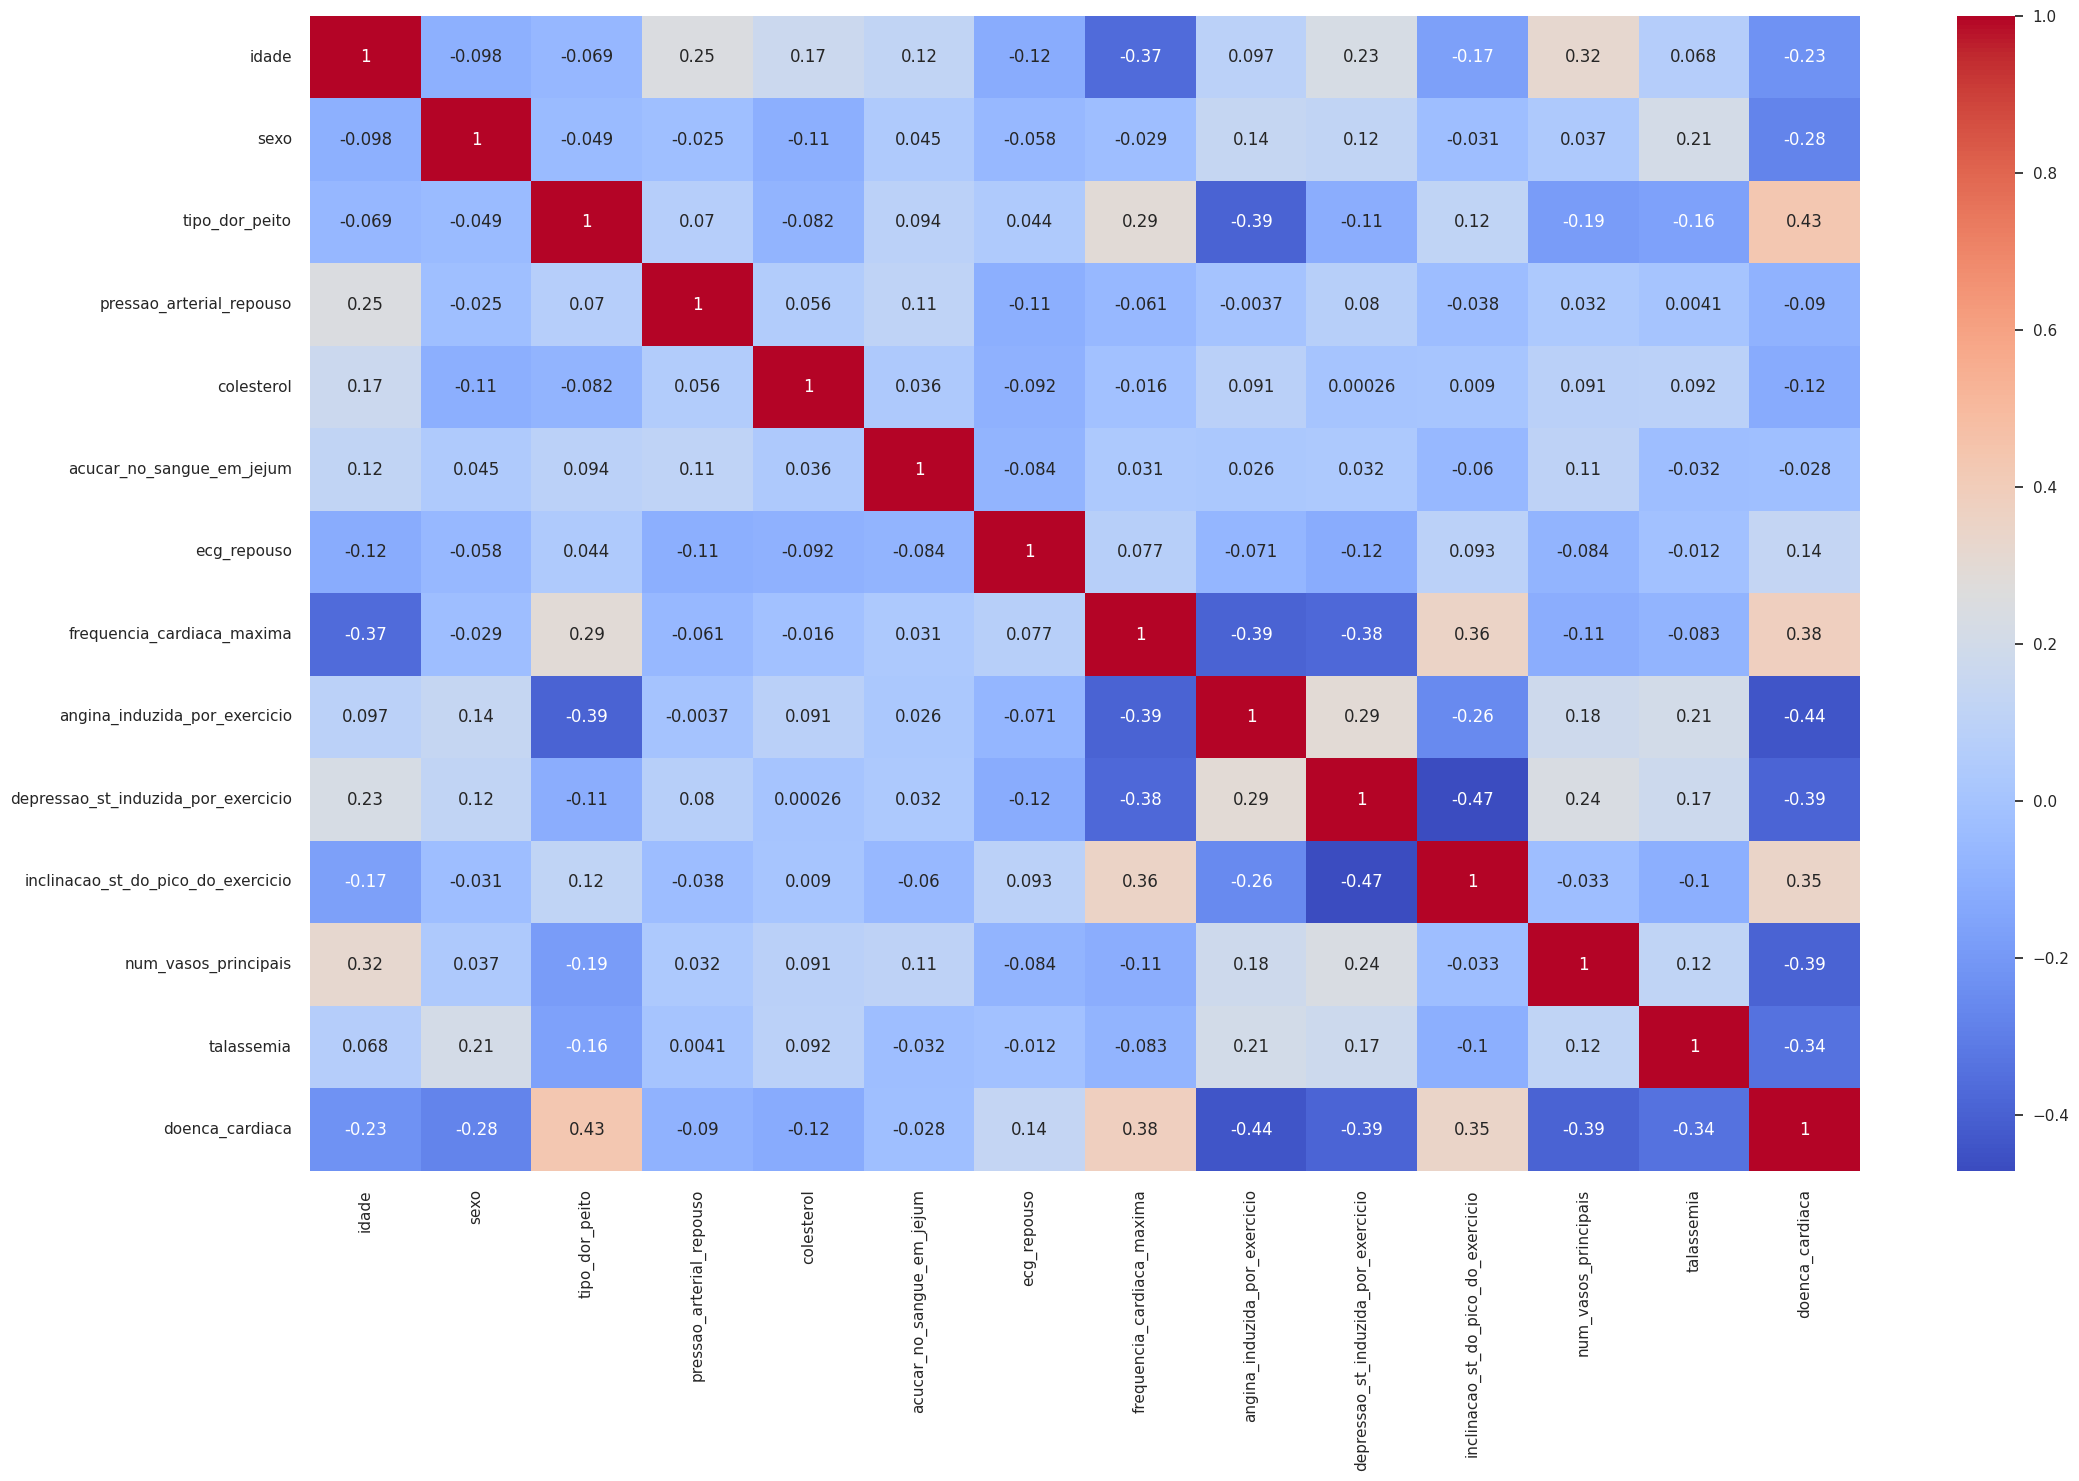

In [489]:
# calcular a matriz de correlação
correlation_matrix = df1.corr(method="pearson")

# plotar o heatmap da matriz de correlação
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.show()

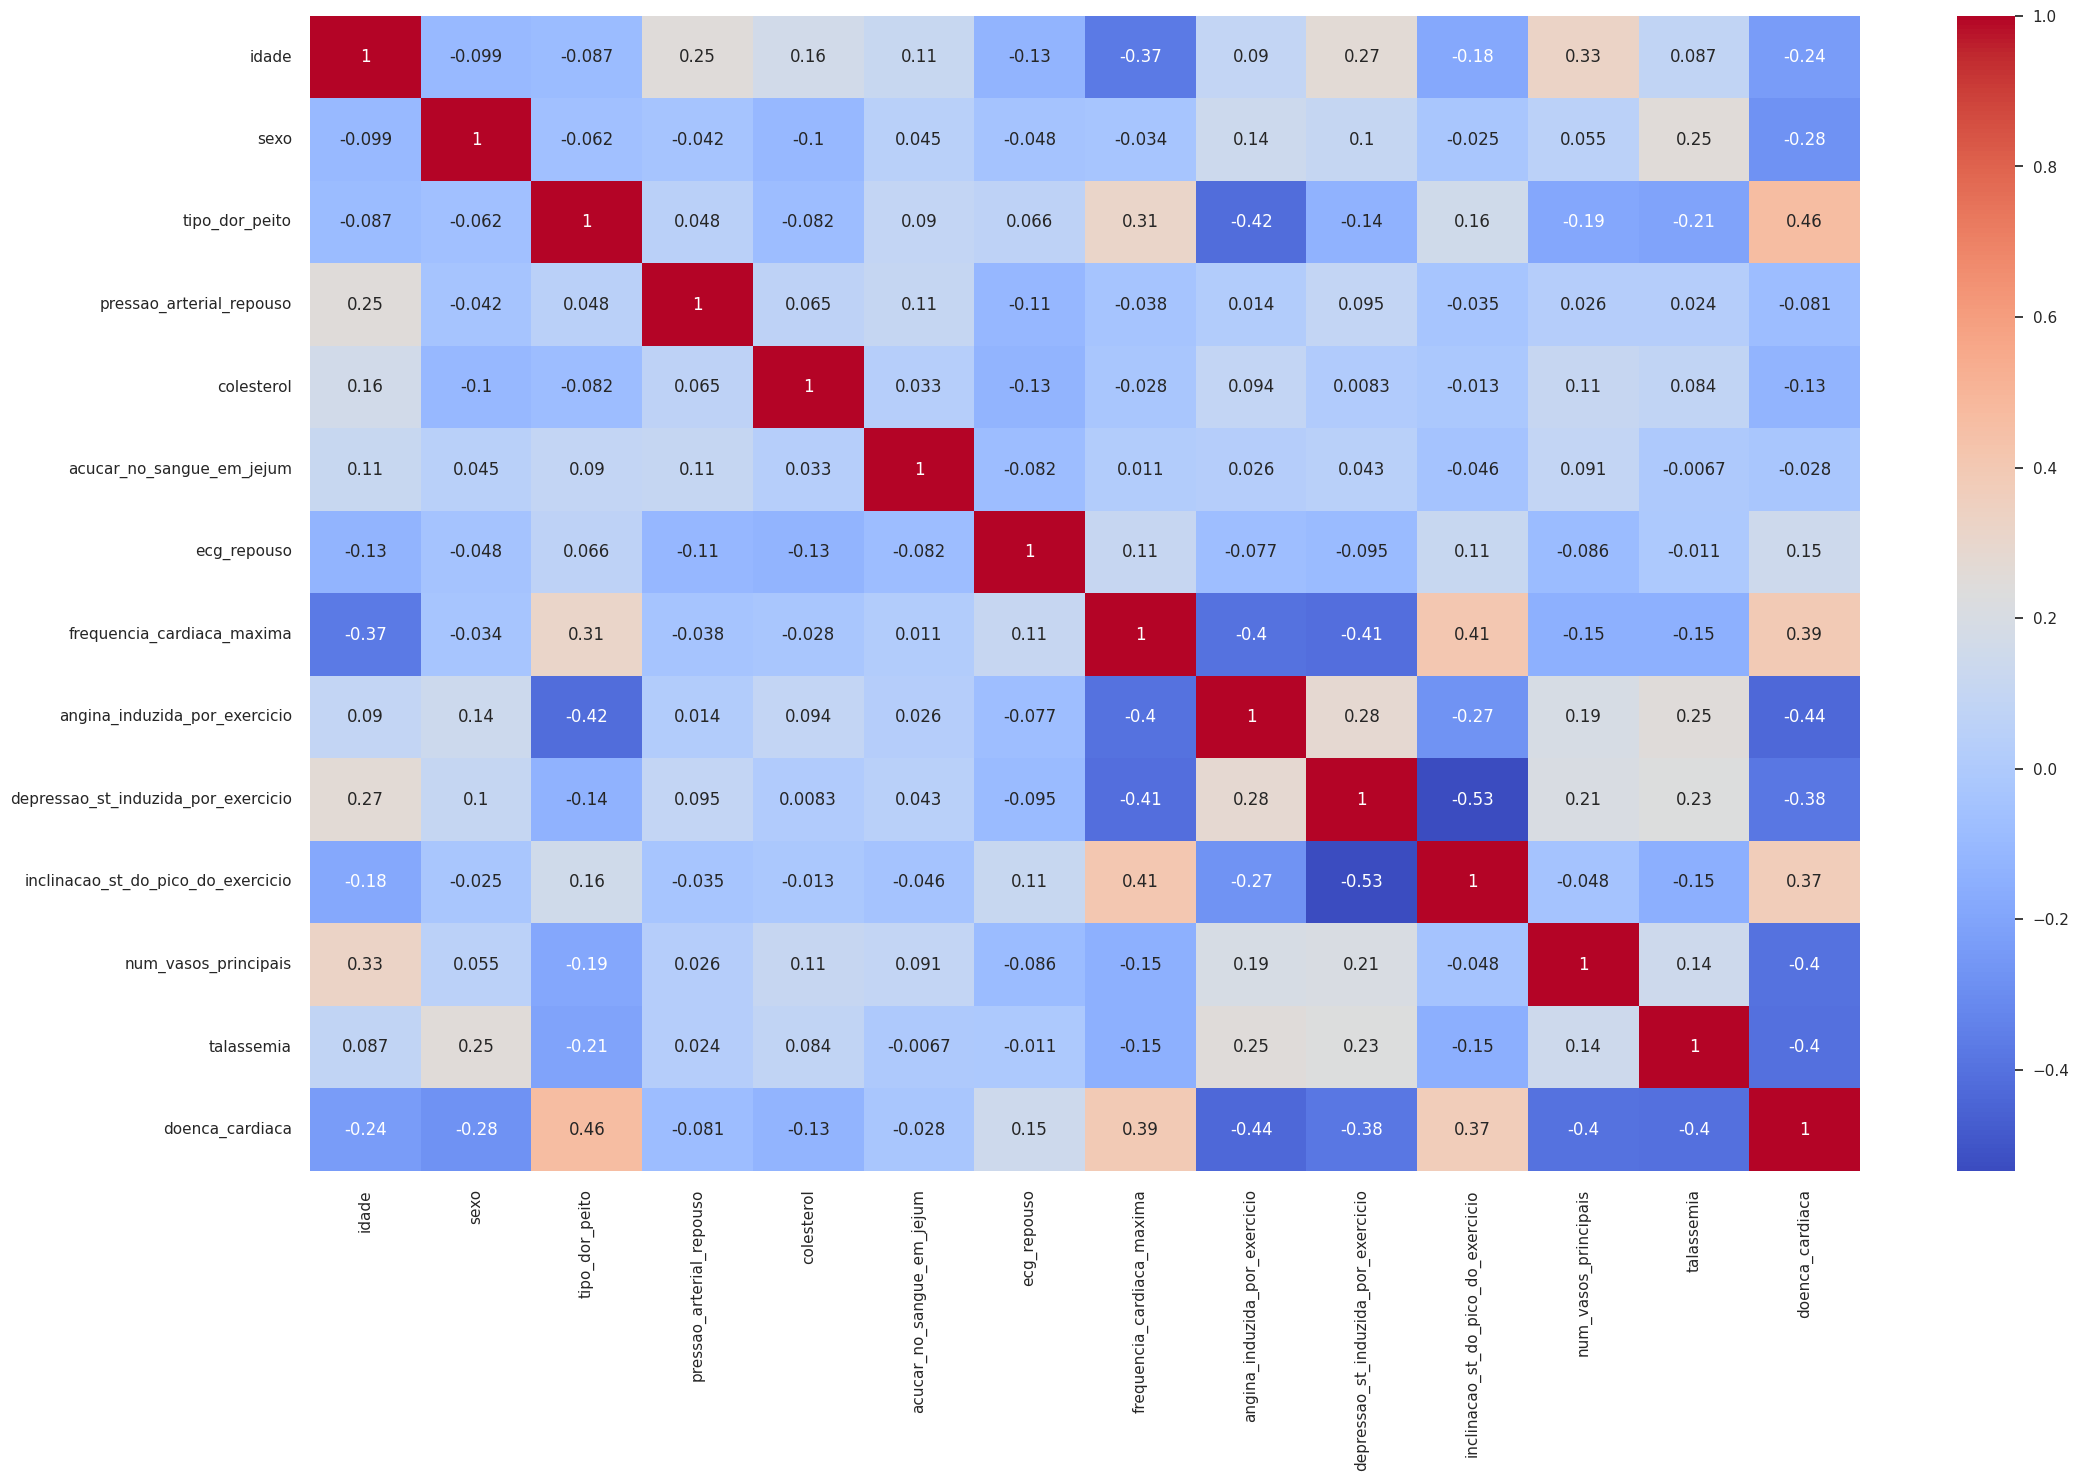

In [491]:
# calcular a matriz de correlação
correlation_matrix = df1.corr(method= "spearman")

# plotar o heatmap da matriz de correlação
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.show()

In [492]:
df2 = df1.copy()

In [493]:
df2.doenca_cardiaca.value_counts() 

1    165
0    138
Name: doenca_cardiaca, dtype: int64

In [494]:
#Upsampling da minoria - aumentar a classe minoritária
from sklearn.utils import resample
mask = df2.doenca_cardiaca == 1
surv_df2 = df2[mask]
death_df2 = df2[~mask]
df2_upsample = resample(surv_df2,replace=True,n_samples=len(death_df2),random_state=42,)
df2 = pd.concat([death_df2, df2_upsample]) 

In [495]:
df2.doenca_cardiaca.value_counts()

0    138
1    138
Name: doenca_cardiaca, dtype: int64

In [496]:
df2.head(5)

,idade,sexo,tipo_dor_peito,pressao_arterial_repouso,colesterol,acucar_no_sangue_em_jejum,ecg_repouso,frequencia_cardiaca_maxima,angina_induzida_por_exercicio,depressao_st_induzida_por_exercicio,inclinacao_st_do_pico_do_exercicio,num_vasos_principais,talassemia,doenca_cardiaca
165,67,1,0,160,286,0,0,108,1,1.5,1,0,2,0
166,67,1,0,120,229,0,0,129,1,2.6,1,2,3,0
167,62,0,0,140,268,0,0,160,0,0.8,0,2,2,0
168,63,1,0,130,254,0,0,147,0,1.4,1,1,3,0
169,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0


In [497]:
#Vamos separar a classe da variável
X = df2.drop(['doenca_cardiaca'], axis=1)
y = df2['doenca_cardiaca']

Não tem doença cardíaca - 1:  138
Tem doencça cardíaca - 2:  138


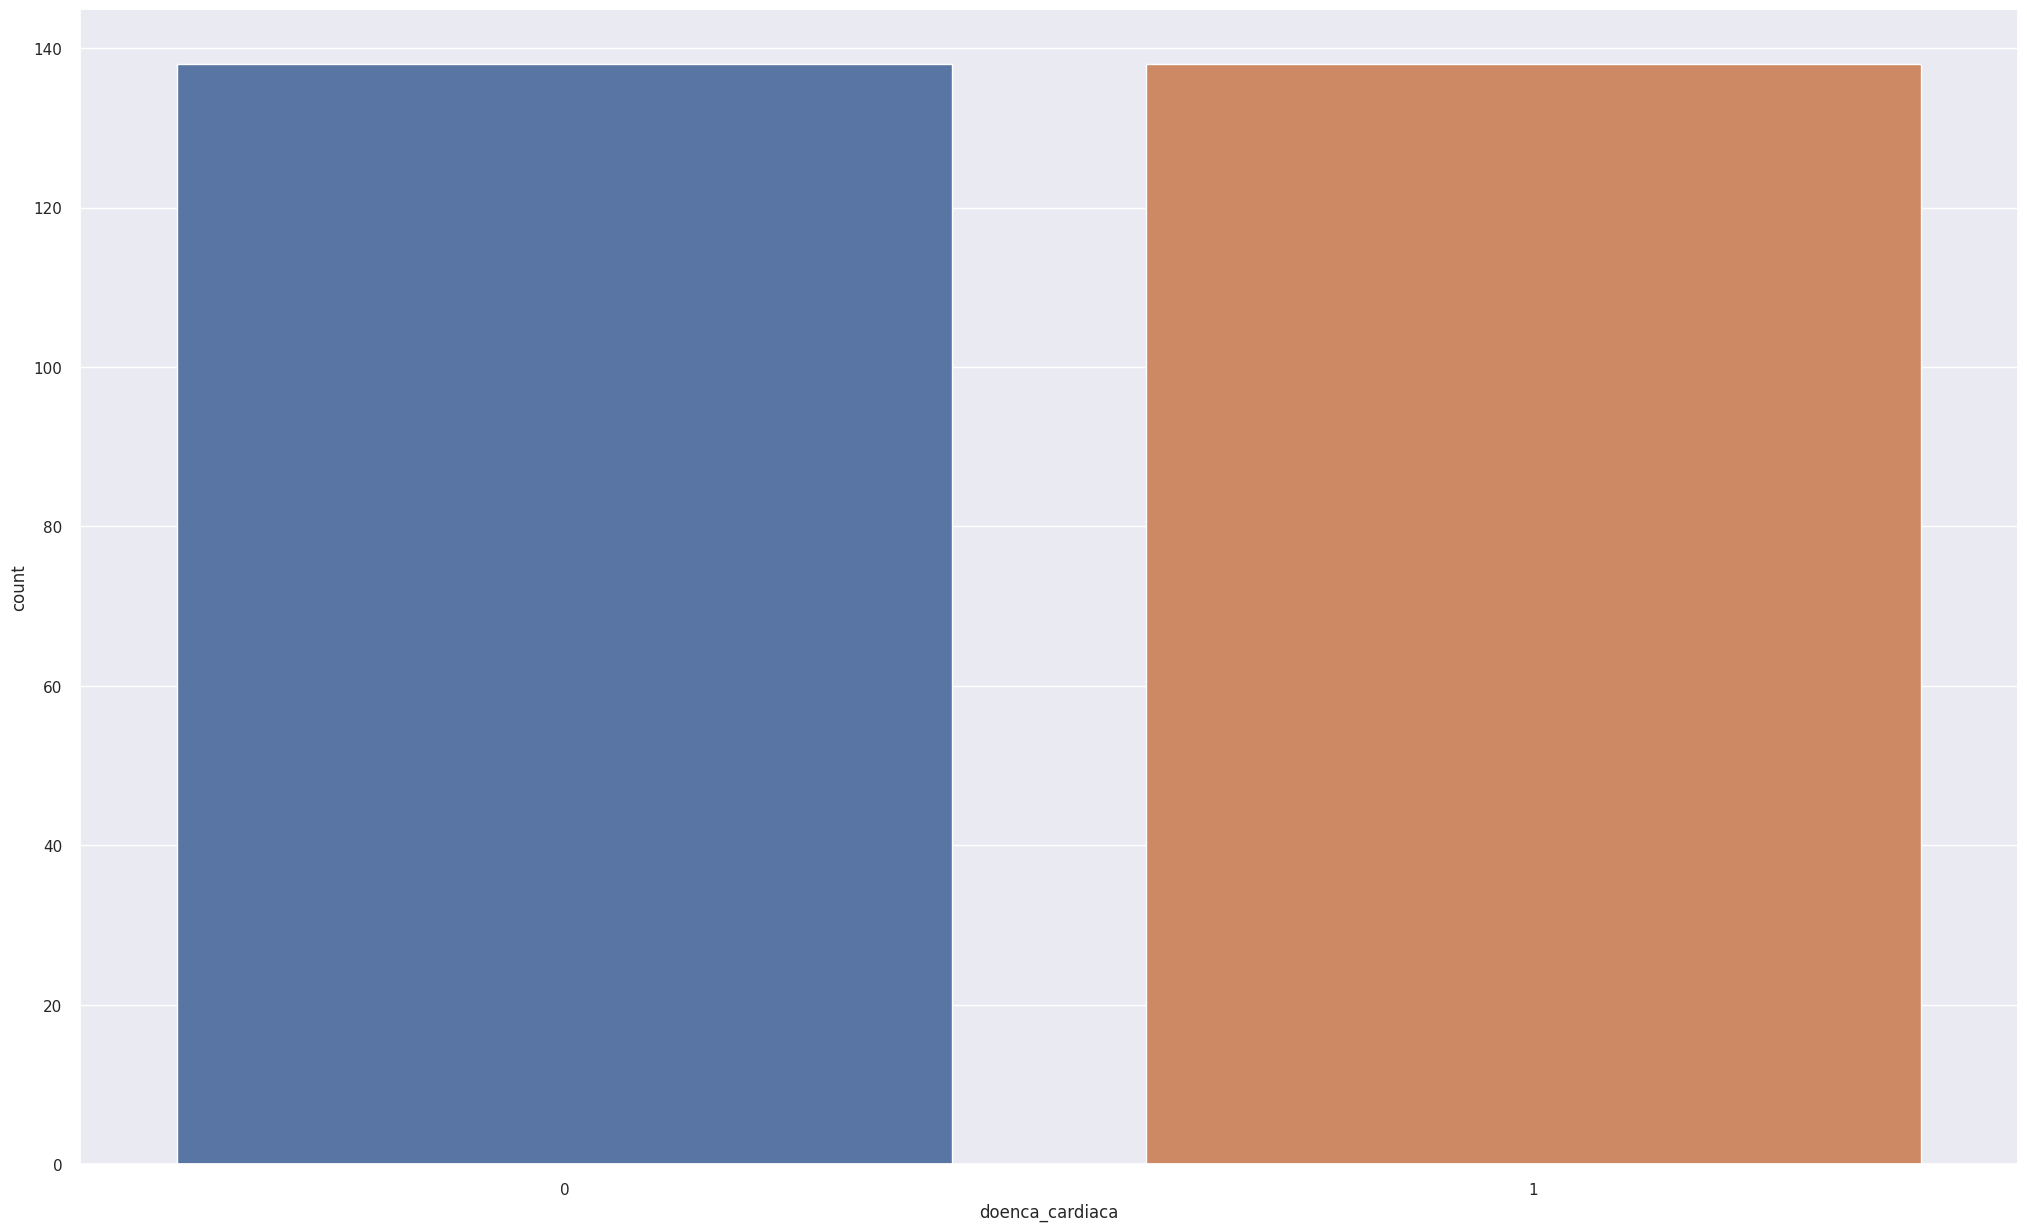

In [498]:
#Rever a distruição das amostras entre as classes
sns.set(style="darkgrid")
ax = sns.countplot(x = y)      
N, S = y.value_counts(sort=True) 
print('Não tem doença cardíaca - 1: ',N)
print('Tem doencça cardíaca - 2: ',S)

In [500]:
df2.to_csv("segundo.csv",index = False)

**NORMALIZAÇÃO**

In [501]:
from sklearn.preprocessing import MinMaxScaler
# create a scaler object
scaler = MinMaxScaler()
# fit and transform the data
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

In [502]:
X

,idade,sexo,tipo_dor_peito,pressao_arterial_repouso,colesterol,acucar_no_sangue_em_jejum,ecg_repouso,frequencia_cardiaca_maxima,angina_induzida_por_exercicio,depressao_st_induzida_por_exercicio,inclinacao_st_do_pico_do_exercicio,num_vasos_principais,talassemia
0,0.791667,1.0,0.000000,0.923077,0.709845,0.0,0.0,0.033333,1.0,0.46875,0.5,0.0,0.666667
1,0.791667,1.0,0.000000,0.307692,0.414508,0.0,0.0,0.266667,1.0,0.81250,0.5,1.0,1.000000
2,0.687500,0.0,0.000000,0.615385,0.616580,0.0,0.0,0.611111,0.0,0.25000,0.0,1.0,0.666667
3,0.708333,1.0,0.000000,0.461538,0.544041,0.0,0.0,0.466667,0.0,0.43750,0.5,0.5,1.000000
4,0.500000,1.0,0.000000,0.615385,0.279793,1.0,0.0,0.555556,1.0,0.96875,0.0,0.0,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
271,0.416667,1.0,0.333333,0.461538,0.606218,0.0,0.5,0.733333,0.0,0.18750,1.0,0.0,0.666667
272,0.562500,1.0,0.333333,0.461538,0.373057,0.0,0.0,0.644444,0.0,0.00000,1.0,0.0,1.000000
273,0.520833,1.0,0.666667,0.307692,0.564767,0.0,0.0,0.466667,0.0,0.12500,0.5,0.0,1.000000
274,0.791667,0.0,0.666667,0.230769,0.471503,0.0,0.0,0.611111,0.0,0.50000,0.5,0.0,1.000000


In [503]:
#Vamos separar em treino e teste
#Eu posso usar 3,5,6, qualquer número inteiro que dentro de um range eu pego um sequencia de valores
X_treino, X_teste, y_treino, y_teste = train_test_split(X,y,test_size = 0.3,random_state = 42)

In [504]:
print(len(X_treino))
print(len(X_teste))

193
83


In [507]:
#Vamos instanciar
lr = LogisticRegression(random_state=42)

In [508]:
#Treinar
lr.fit(X_treino, y_treino)

LogisticRegression(random_state=42)

In [509]:
lr.score(X_teste, y_teste)

0.8554216867469879

In [510]:
lr = LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True, 
                        intercept_scaling=1, max_iter=100, multi_class='ovr', 
                        n_jobs=1, penalty='l2', random_state=42, solver='liblinear', 
                        tol=0.0001, verbose=0, warm_start=False)

In [511]:
lr.fit(X_treino, y_treino)

LogisticRegression(multi_class='ovr', n_jobs=1, random_state=42,
                   solver='liblinear')

In [512]:
lr.score(X_teste, y_teste)

0.8795180722891566

### **Random forest**

In [513]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import (train_test_split, cross_val_score)

In [514]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)

In [515]:
rf.fit(X_treino, y_treino)

RandomForestClassifier(random_state=42)

In [516]:
rf.score(X_teste, y_teste)

0.9036144578313253

In [520]:
rf = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini', max_depth=None, max_features='auto', 
                            max_leaf_nodes=None, min_impurity_decrease=0.0, min_samples_leaf=1, 
                            min_samples_split=2, min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1, 
                            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [521]:
rf.fit(X_treino, y_treino)

/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


RandomForestClassifier(max_features='auto', n_estimators=10, n_jobs=1,
                       random_state=42)

In [522]:
rf.score(X_teste, y_teste) 

0.8795180722891566

**Validação Cruzada**

In [523]:
cv_scores = cross_val_score(rf,X,y, cv=10, scoring='accuracy')
print(f'Scores = {cv_scores}')
print(f'Média dos Scores = {cv_scores.mean()}')
     

/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForest

Scores = [0.85714286 0.92857143 0.92857143 0.85714286 0.89285714 0.85714286
 0.88888889 0.74074074 0.81481481 0.81481481]
Média dos Scores = 0.8580687830687831


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


In [524]:
rf_previsoes = rf.predict(X_teste)
rf_previsoes

array([0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1])

In [525]:
rf_previsoes_prob = rf.predict_proba(X_teste)
rf_previsoes_prob

array([[1. , 0. ],
       [0.9, 0.1],
       [0.1, 0.9],
       [0.9, 0.1],
       [0.3, 0.7],
       [0. , 1. ],
       [0.2, 0.8],
       [0.1, 0.9],
       [0.6, 0.4],
       [0.1, 0.9],
       [0.9, 0.1],
       [0.6, 0.4],
       [0.2, 0.8],
       [0.2, 0.8],
       [0. , 1. ],
       [0.6, 0.4],
       [0.2, 0.8],
       [0.9, 0.1],
       [0.6, 0.4],
       [0.6, 0.4],
       [0.7, 0.3],
       [0.5, 0.5],
       [0.7, 0.3],
       [0.1, 0.9],
       [0.8, 0.2],
       [0.1, 0.9],
       [0.7, 0.3],
       [1. , 0. ],
       [1. , 0. ],
       [0.1, 0.9],
       [1. , 0. ],
       [0.9, 0.1],
       [0.7, 0.3],
       [1. , 0. ],
       [0.1, 0.9],
       [0.8, 0.2],
       [0.3, 0.7],
       [0.1, 0.9],
       [0.7, 0.3],
       [0.9, 0.1],
       [1. , 0. ],
       [0.9, 0.1],
       [0.8, 0.2],
       [0.8, 0.2],
       [1. , 0. ],
       [0.4, 0.6],
       [0.5, 0.5],
       [0.1, 0.9],
       [0. , 1. ],
       [0. , 1. ],
       [0.6, 0.4],
       [0.1, 0.9],
       [0. ,

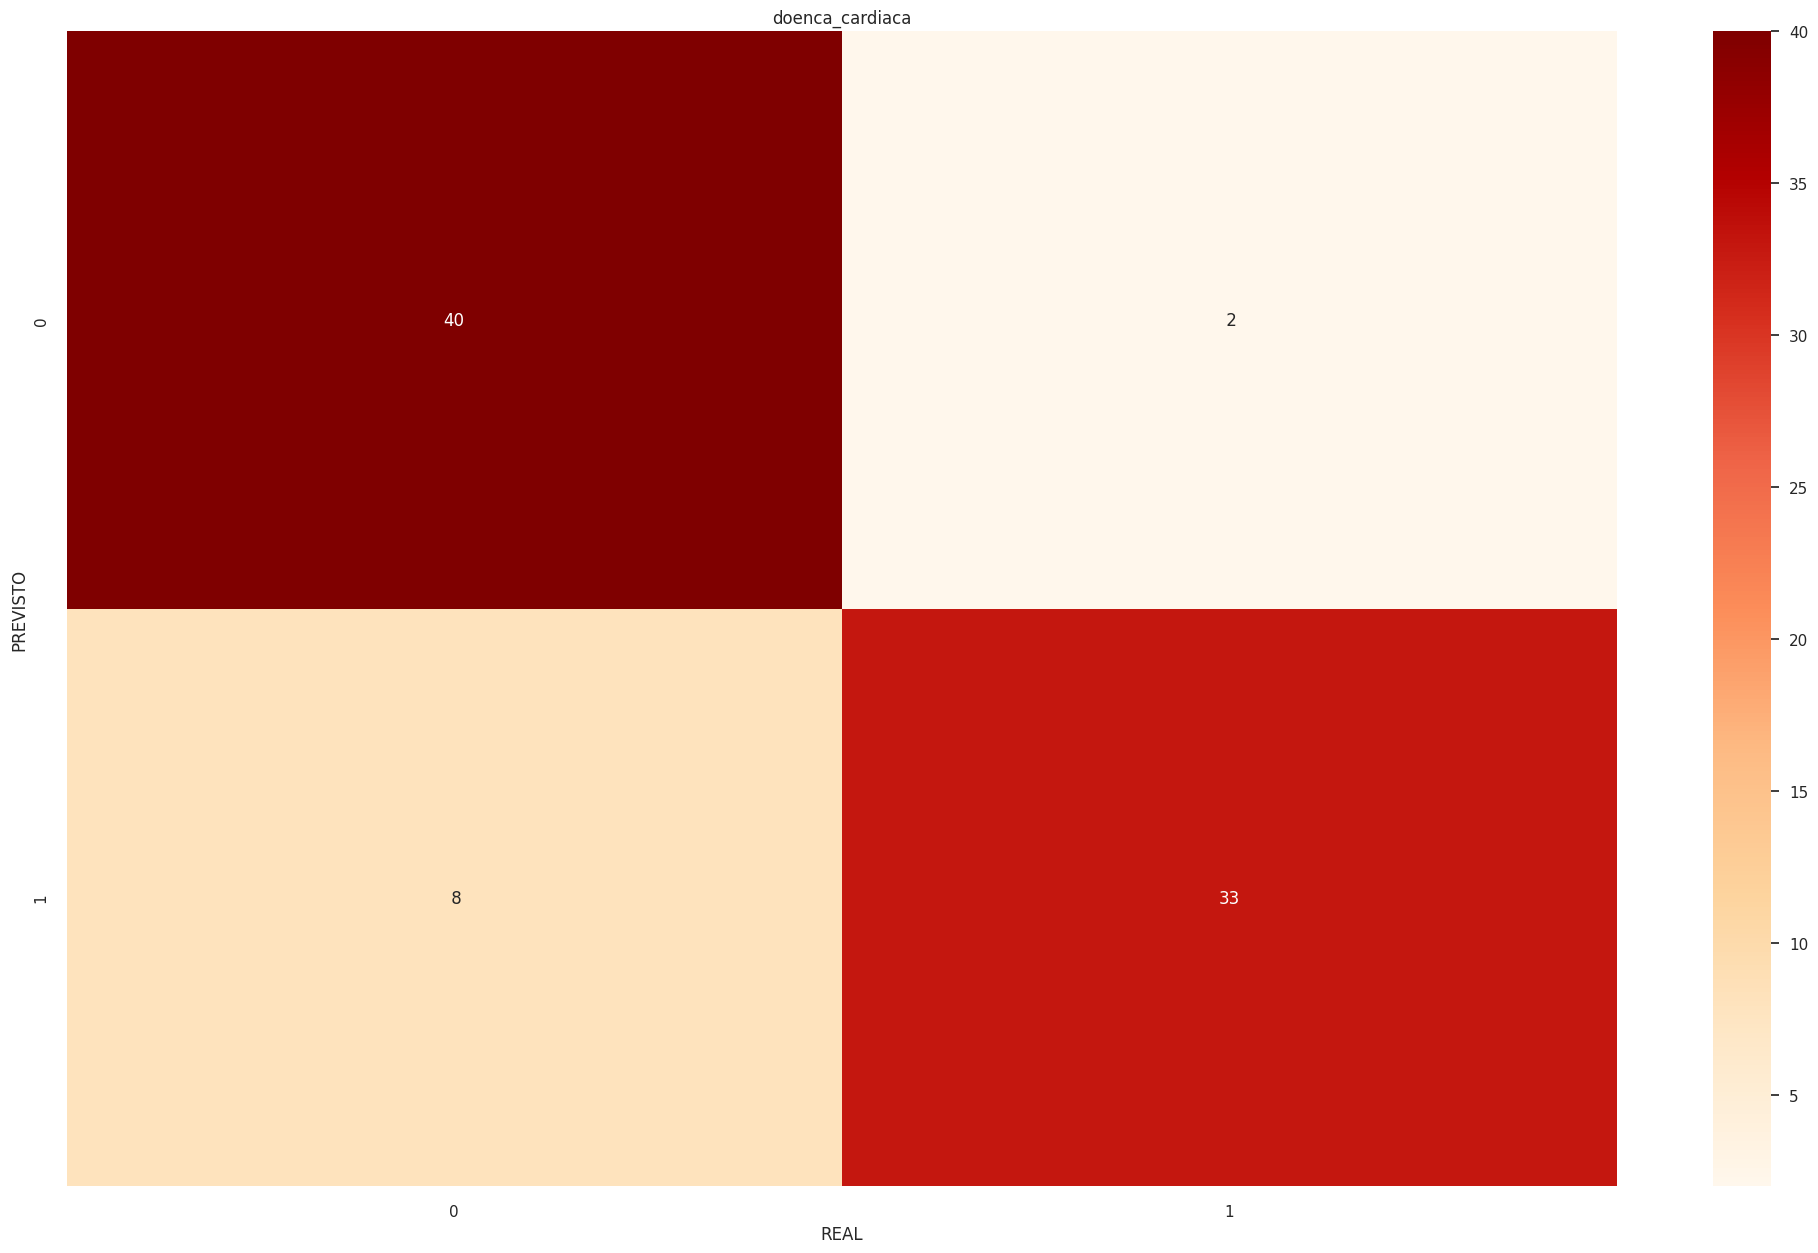

In [526]:
sns.heatmap(confusion_matrix(y_teste, rf_previsoes), cmap='OrRd', annot=True, fmt='2.0f')
plt.title('doenca_cardiaca')
plt.ylabel('PREVISTO')
plt.xlabel('REAL')
plt.show()

In [527]:
acuracia = accuracy_score(y_teste,rf_previsoes)
precisao = precision_score(y_teste,rf_previsoes)
recall = recall_score(y_teste,rf_previsoes)
f1Score = f1_score(y_teste,rf_previsoes)
rf_curva_roc = roc_auc_score(y_teste,rf_previsoes)
kappa = cohen_kappa_score(y_teste,rf_previsoes)
print(f'Acurácia:{round(acuracia,2)}')
print(f'Precisão:{round(precisao,2)}')
print(f'Recall ou Sensibilidade:{round(recall,2)}')
print(f'F1-Score:{round(f1Score,2)}')
print(f'Kappa:{round(kappa,2)}')
print(f'Curva ROC:{round(rf_curva_roc,2)}')
     

Acurácia:0.88
Precisão:0.94
Recall ou Sensibilidade:0.8
F1-Score:0.87
Kappa:0.76
Curva ROC:0.88


In [528]:
print(classification_report(y_teste, rf.predict(X_teste)))

              precision    recall  f1-score   support

           0       0.83      0.95      0.89        42
           1       0.94      0.80      0.87        41

    accuracy                           0.88        83
   macro avg       0.89      0.88      0.88        83
weighted avg       0.89      0.88      0.88        83



In [529]:
#cv_scores = cross_val_score(svc,X,y, cv=10, scoring='accuracy')
print(f'Scores = {cv_scores}')
print(f'Média dos Scores = {cv_scores.mean()}')
     

Scores = [0.85714286 0.92857143 0.92857143 0.85714286 0.89285714 0.85714286
 0.88888889 0.74074074 0.81481481 0.81481481]
Média dos Scores = 0.8580687830687831


In [530]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.utils import resample
from sklearn.model_selection import (train_test_split, cross_val_score) 
from sklearn.metrics import (cohen_kappa_score,confusion_matrix, accuracy_score, precision_score, recall_score, 
f1_score, roc_auc_score,roc_curve,auc,classification_report)

In [531]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

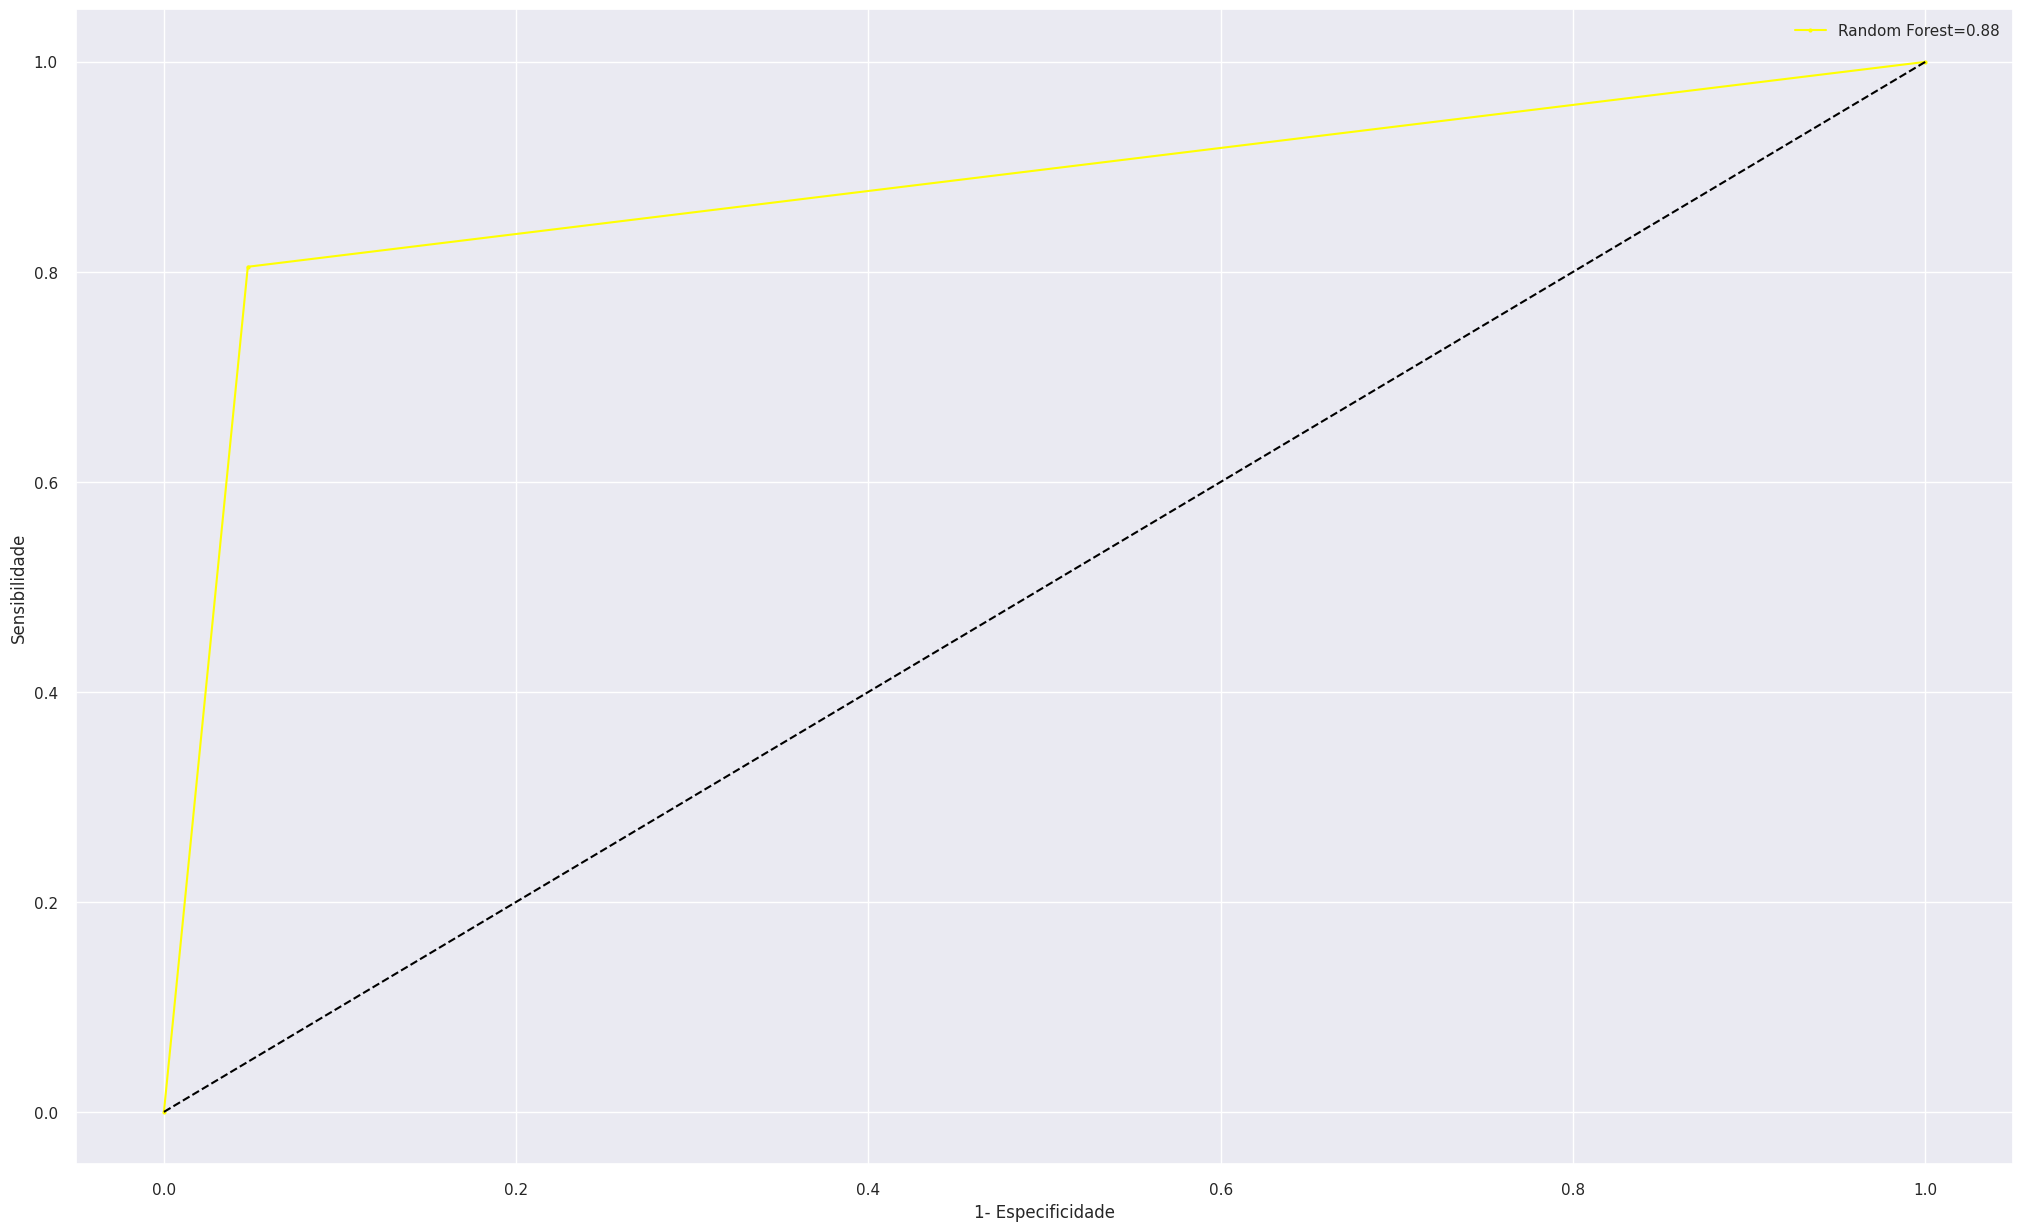

In [532]:
rf_fp,rf_vp,lim1 = roc_curve(y_teste,rf_previsoes, pos_label=1)
plt.plot(rf_fp,rf_vp, marker='.', label='Random Forest='+str(round(rf_curva_roc,2)),color="yellow")
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
# alterando o nome dos eixos
plt.xlabel('1- Especificidade')
plt.ylabel('Sensibilidade')
# Legenda
plt.legend()
# Mostrando o gráfico
plt.show()
#fig.savefig("images/mlpr_0305.png")

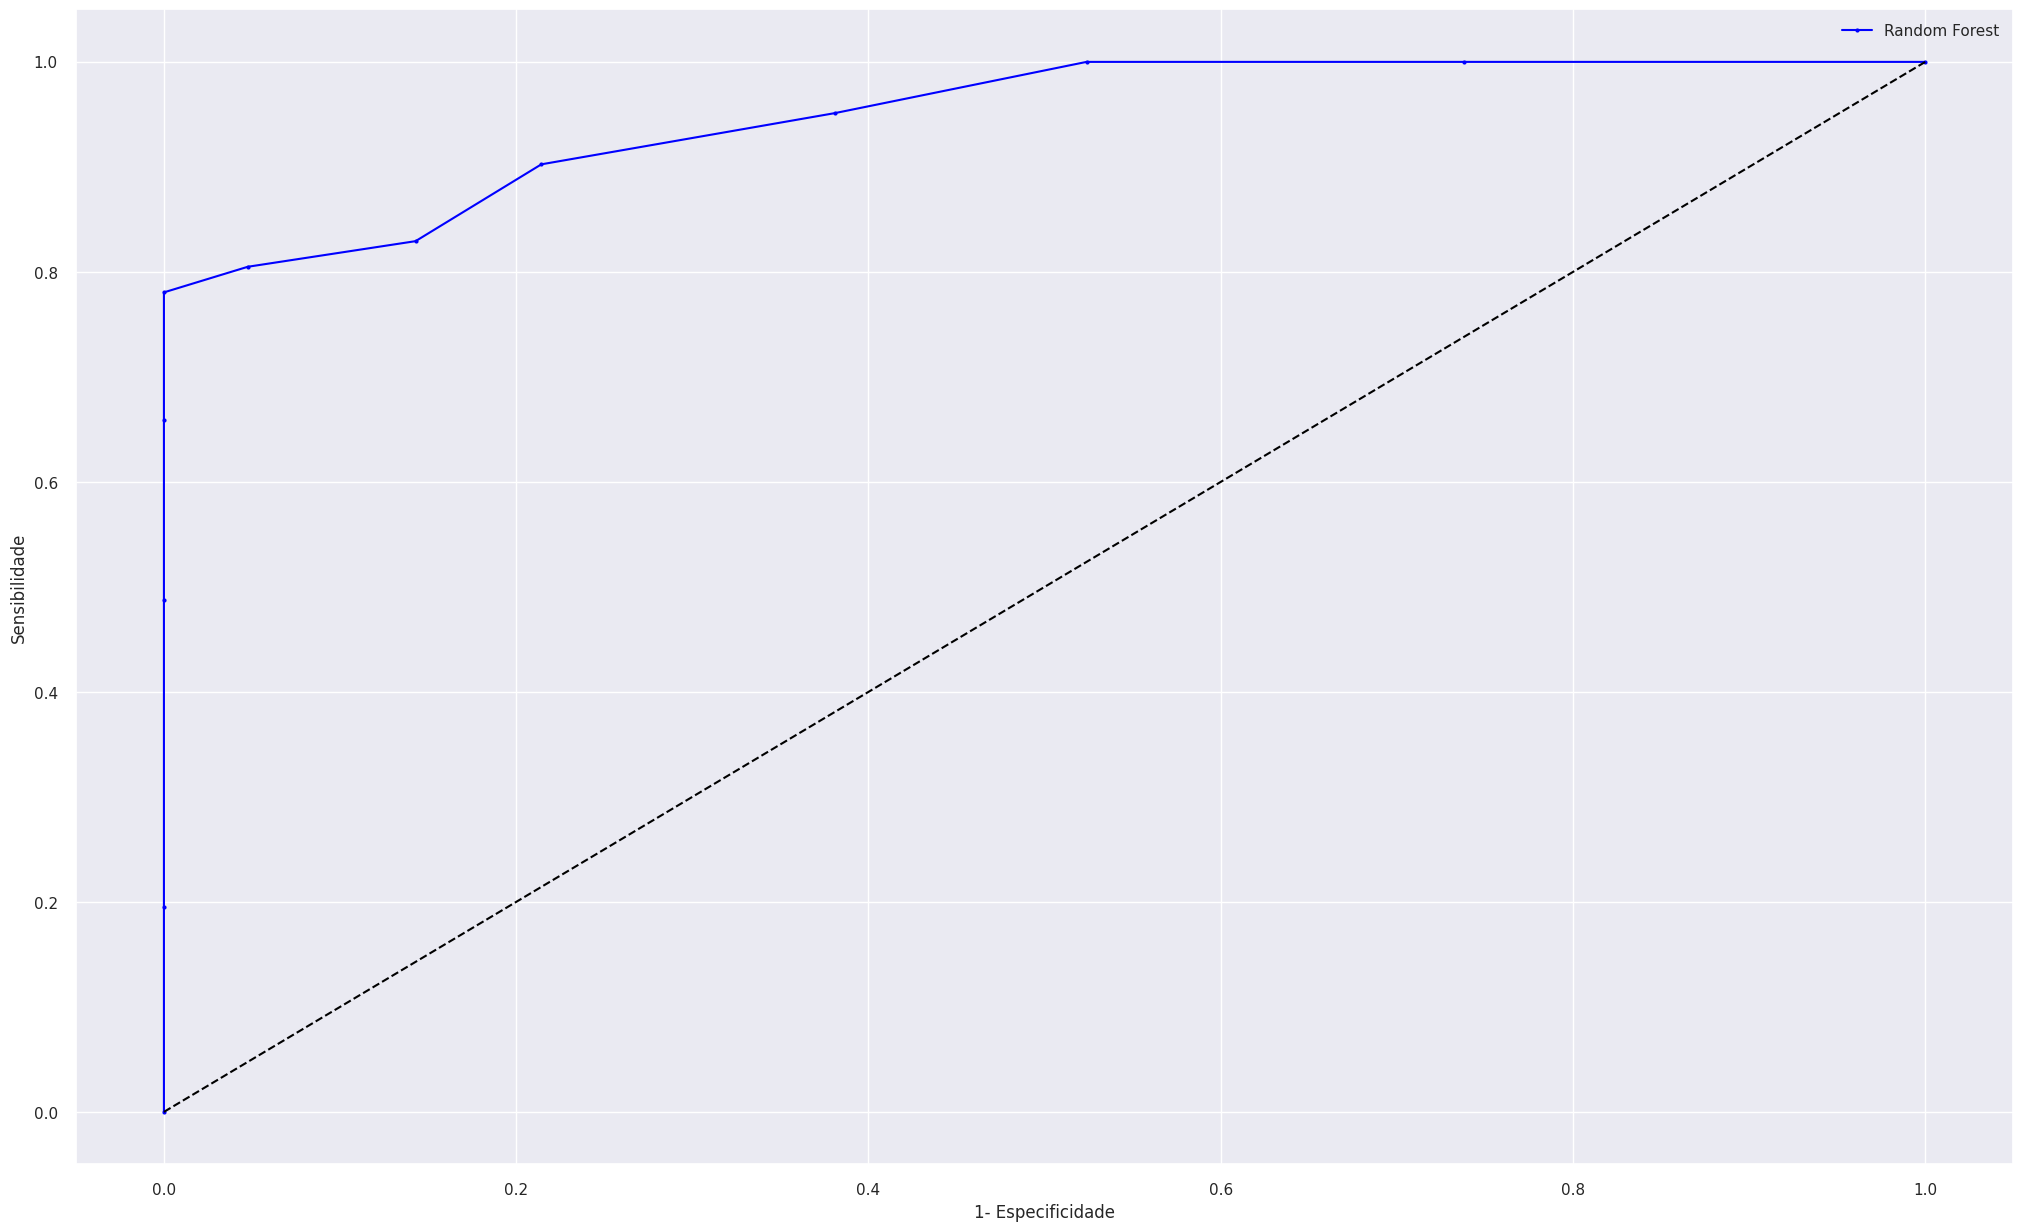

In [533]:
#Aqui estamos pegando apenas da classe 1
rf_probs = rf_previsoes_prob[:,1]
rf_fp,rf_vp,lim1 = roc_curve(y_teste,rf_probs, pos_label=1)
plt.plot(rf_fp,rf_vp, marker='.', label='Random Forest',color="blue")
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
# alterando o nome dos eixos
plt.xlabel('1- Especificidade')
plt.ylabel('Sensibilidade')
# Legenda
plt.legend()
# Mostrando o gráfico
plt.show()
#fig.savefig("images/mlpr_0305.png")

In [534]:
X_teste

,idade,sexo,tipo_dor_peito,pressao_arterial_repouso,colesterol,acucar_no_sangue_em_jejum,ecg_repouso,frequencia_cardiaca_maxima,angina_induzida_por_exercicio,depressao_st_induzida_por_exercicio,inclinacao_st_do_pico_do_exercicio,num_vasos_principais,talassemia
30,0.625000,1.0,0.000000,0.461538,0.917098,0.0,0.0,0.388889,1.0,0.25000,0.0,0.0,1.000000
124,0.541667,0.0,0.000000,0.430769,0.290155,0.0,1.0,0.277778,1.0,0.62500,0.5,0.5,1.000000
196,0.166667,1.0,0.666667,0.461538,0.523316,0.0,0.5,0.911111,0.0,0.25000,0.0,0.0,0.666667
127,0.604167,0.0,0.000000,0.461538,0.393782,1.0,0.0,0.455556,1.0,0.87500,0.5,1.0,0.333333
216,0.458333,0.0,0.666667,0.615385,0.823834,0.0,0.0,0.411111,0.0,0.46875,1.0,0.5,0.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...
82,0.770833,1.0,0.333333,0.923077,0.502591,0.0,0.5,0.166667,1.0,0.00000,0.5,0.0,0.333333
113,0.604167,0.0,0.333333,0.553846,0.880829,1.0,0.0,0.522222,0.0,0.00000,1.0,1.0,0.666667
55,0.708333,0.0,0.000000,0.769231,0.471503,0.0,0.0,0.544444,0.0,0.25000,0.5,0.0,1.000000
186,0.479167,1.0,1.000000,0.800000,0.772021,1.0,0.5,0.811111,0.0,0.37500,0.5,0.0,1.000000


In [535]:
lr_previsoes_1 = lr.predict(X_teste[:1])
lr_previsoes_1

array([0])

In [536]:
lr_previsoes_1 = lr.predict_proba(X_teste[:1])
lr_previsoes_1

array([[0.95811866, 0.04188134]])

### **Rede Neural Densa**

In [537]:
#!pip install keras

In [538]:
#pip install tensorflow

In [539]:
import pandas as pd
from sklearn.model_selection import train_test_split
#Keras is an API follows best practices for reducing cognitive load: it offers consistent & simple APIs, 
#it minimizes the number of user actions required for common use cases
import keras
#Classe para a criação da rede neural
from keras.models import Sequential
#Importar a classe para implementar as camadas densas, onde casa um dos neurônios e ligado a cada uma de uma
#camada oculta.
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier

In [540]:
X = df.drop('doenca_cardiaca', axis=1)
y = df['doenca_cardiaca']

In [541]:
X.shape

(303, 13)

In [542]:
display(X)

,idade,sexo,tipo_dor_peito,pressao_arterial_repouso,colesterol,acucar_no_sangue_em_jejum,ecg_repouso,frequencia_cardiaca_maxima,angina_induzida_por_exercicio,depressao_st_induzida_por_exercicio,inclinacao_st_do_pico_do_exercicio,num_vasos_principais,talassemia
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [543]:
display(y)

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: doenca_cardiaca, Length: 303, dtype: int64

In [546]:
!pip install -U scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [547]:
from sklearn.model_selection import train_test_split

In [548]:
X_treinamento, X_teste, y_treinamento, y_teste = train_test_split(X, y, test_size=0.25)

In [549]:
#Criando a minha rede neural
classificador = Sequential()

In [550]:
classificador = Sequential()
classificador.add(Dense(units=16, activation='relu', input_dim=13))
classificador.add(Dense(units=1, activation='sigmoid'))

In [551]:
#binary_crossentropy é a função de perda como eu vou calcular o erro.
classificador.compile(optimizer = 'adam', loss = 'binary_crossentropy',
                      metrics = ['binary_accuracy'])

**Batch_size - quantidade de amostras**

In [552]:
#Calcula o erro para 10 registros e depois atualiza os pesos
#epochs = 100, vai rodar 100 vezes
classificador.fit(X_treinamento, y_treinamento,batch_size = 10, epochs = 100)

Epoch 1/100
23/23 [==============================] - 2s 4ms/step - loss: 31.3308 - binary_accuracy: 0.5551
Epoch 2/100
23/23 [==============================] - 0s 4ms/step - loss: 17.4537 - binary_accuracy: 0.5551
Epoch 3/100
23/23 [==============================] - 0s 5ms/step - loss: 4.3948 - binary_accuracy: 0.4229
Epoch 4/100
23/23 [==============================] - 0s 4ms/step - loss: 2.1965 - binary_accuracy: 0.4405
Epoch 5/100
23/23 [==============================] - 0s 6ms/step - loss: 1.7763 - binary_accuracy: 0.4097
Epoch 6/100
23/23 [==============================] - 0s 5ms/step - loss: 1.4468 - binary_accuracy: 0.4537
Epoch 7/100
23/23 [==============================] - 0s 8ms/step - loss: 1.2802 - binary_accuracy: 0.4890
Epoch 8/100
23/23 [==============================] - 0s 7ms/step - loss: 1.0315 - binary_accuracy: 0.5507
Epoch 9/100
23/23 [==============================] - 0s 6ms/step - loss: 0.8981 - binary_accuracy: 0.5991
Epoch 10/100
23/23 [========================

In [553]:
#previsoes em probabilidade
previsoes = classificador.predict(X_teste)

3/3 [==============================] - 0s 4ms/step


In [554]:
#Como entender a notação científica
no1 = float(1000000.00000)
no2 = float(0.00000009)
print(format(no1,'.1E'))
print(format(no2,'.1E'))

1.0E+06
9.0E-08


In [555]:
print(previsoes[1:10])

[[0.99404866]
 [0.09984522]
 [0.9595565 ]
 [0.9238496 ]
 [0.8868556 ]
 [0.9548798 ]
 [0.53896004]
 [0.72360873]
 [0.6539415 ]]


In [556]:
print(y_teste[1:10])

62     1
219    0
46     1
12     1
75     1
38     1
270    0
93     1
119    1
Name: doenca_cardiaca, dtype: int64


In [557]:
#Tranformar em True/False
previsoes = (previsoes > 0.5)
print(previsoes[1:10])

[[ True]
 [False]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]]


**Matriz de confusão**

In [559]:
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
from yellowbrick.classifier import  ROCAUC
from sklearn.metrics import (cohen_kappa_score,confusion_matrix, accuracy_score, precision_score, recall_score, 
f1_score, roc_auc_score,roc_curve,auc,r2_score,classification_report)

In [560]:
precisao = accuracy_score(y_teste, previsoes)
print(precisao)
previsoes

0.881578947368421


array([[ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [

In [561]:
matriz = confusion_matrix(y_teste, previsoes)

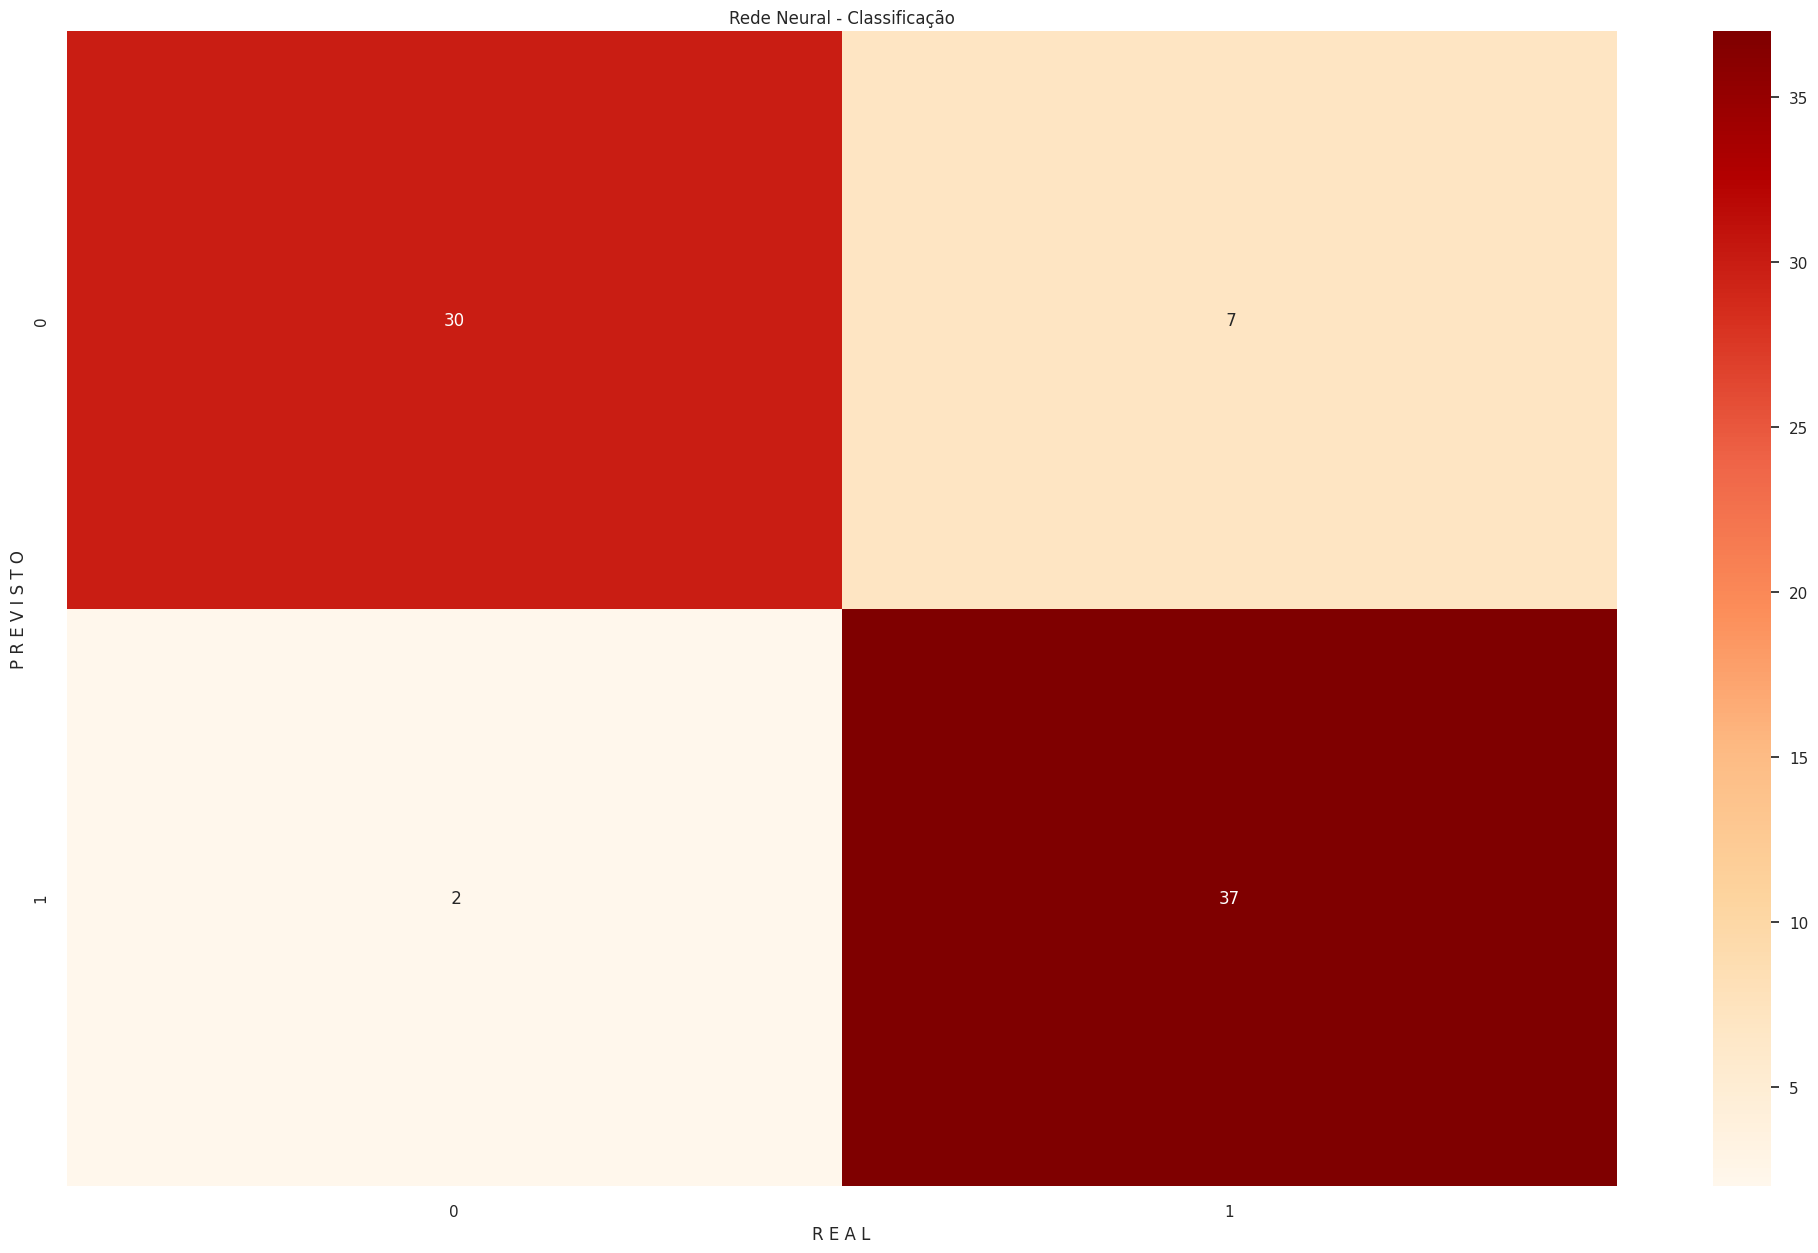

In [562]:
sns.heatmap(confusion_matrix(y_teste, previsoes), cmap='OrRd', annot=True, fmt='2.0f')
plt.title('Rede Neural - Classificação')
plt.ylabel('P R E V I S T O')
plt.xlabel('R E A L')
plt.show()

**Métricas**

In [563]:
#Acurácia, Sensibilidade positiva (VP/(VP+FN),  Precisão, Recall, F1-Score
acuracia = accuracy_score(y_teste,previsoes)
precisao = precision_score(y_teste,previsoes)
recall = recall_score(y_teste,previsoes)
f1Score = f1_score(y_teste,previsoes)
curva_roc = roc_auc_score(y_teste,previsoes)
kappa = cohen_kappa_score(y_teste,previsoes)
print(f'Acurácia:{round(acuracia,2)}')
print(f'Precisão:{round(precisao,2)}')
print(f'Recall ou Sensibilidade:{round(recall,2)}')
print(f'F1-Score:{round(f1Score,2)}')
print(f'Kappa:{round(kappa,2)}')
print(f'Curva ROC:{round(curva_roc,2)}')

Acurácia:0.88
Precisão:0.84
Recall ou Sensibilidade:0.95
F1-Score:0.89
Kappa:0.76
Curva ROC:0.88


**Curva Roc**

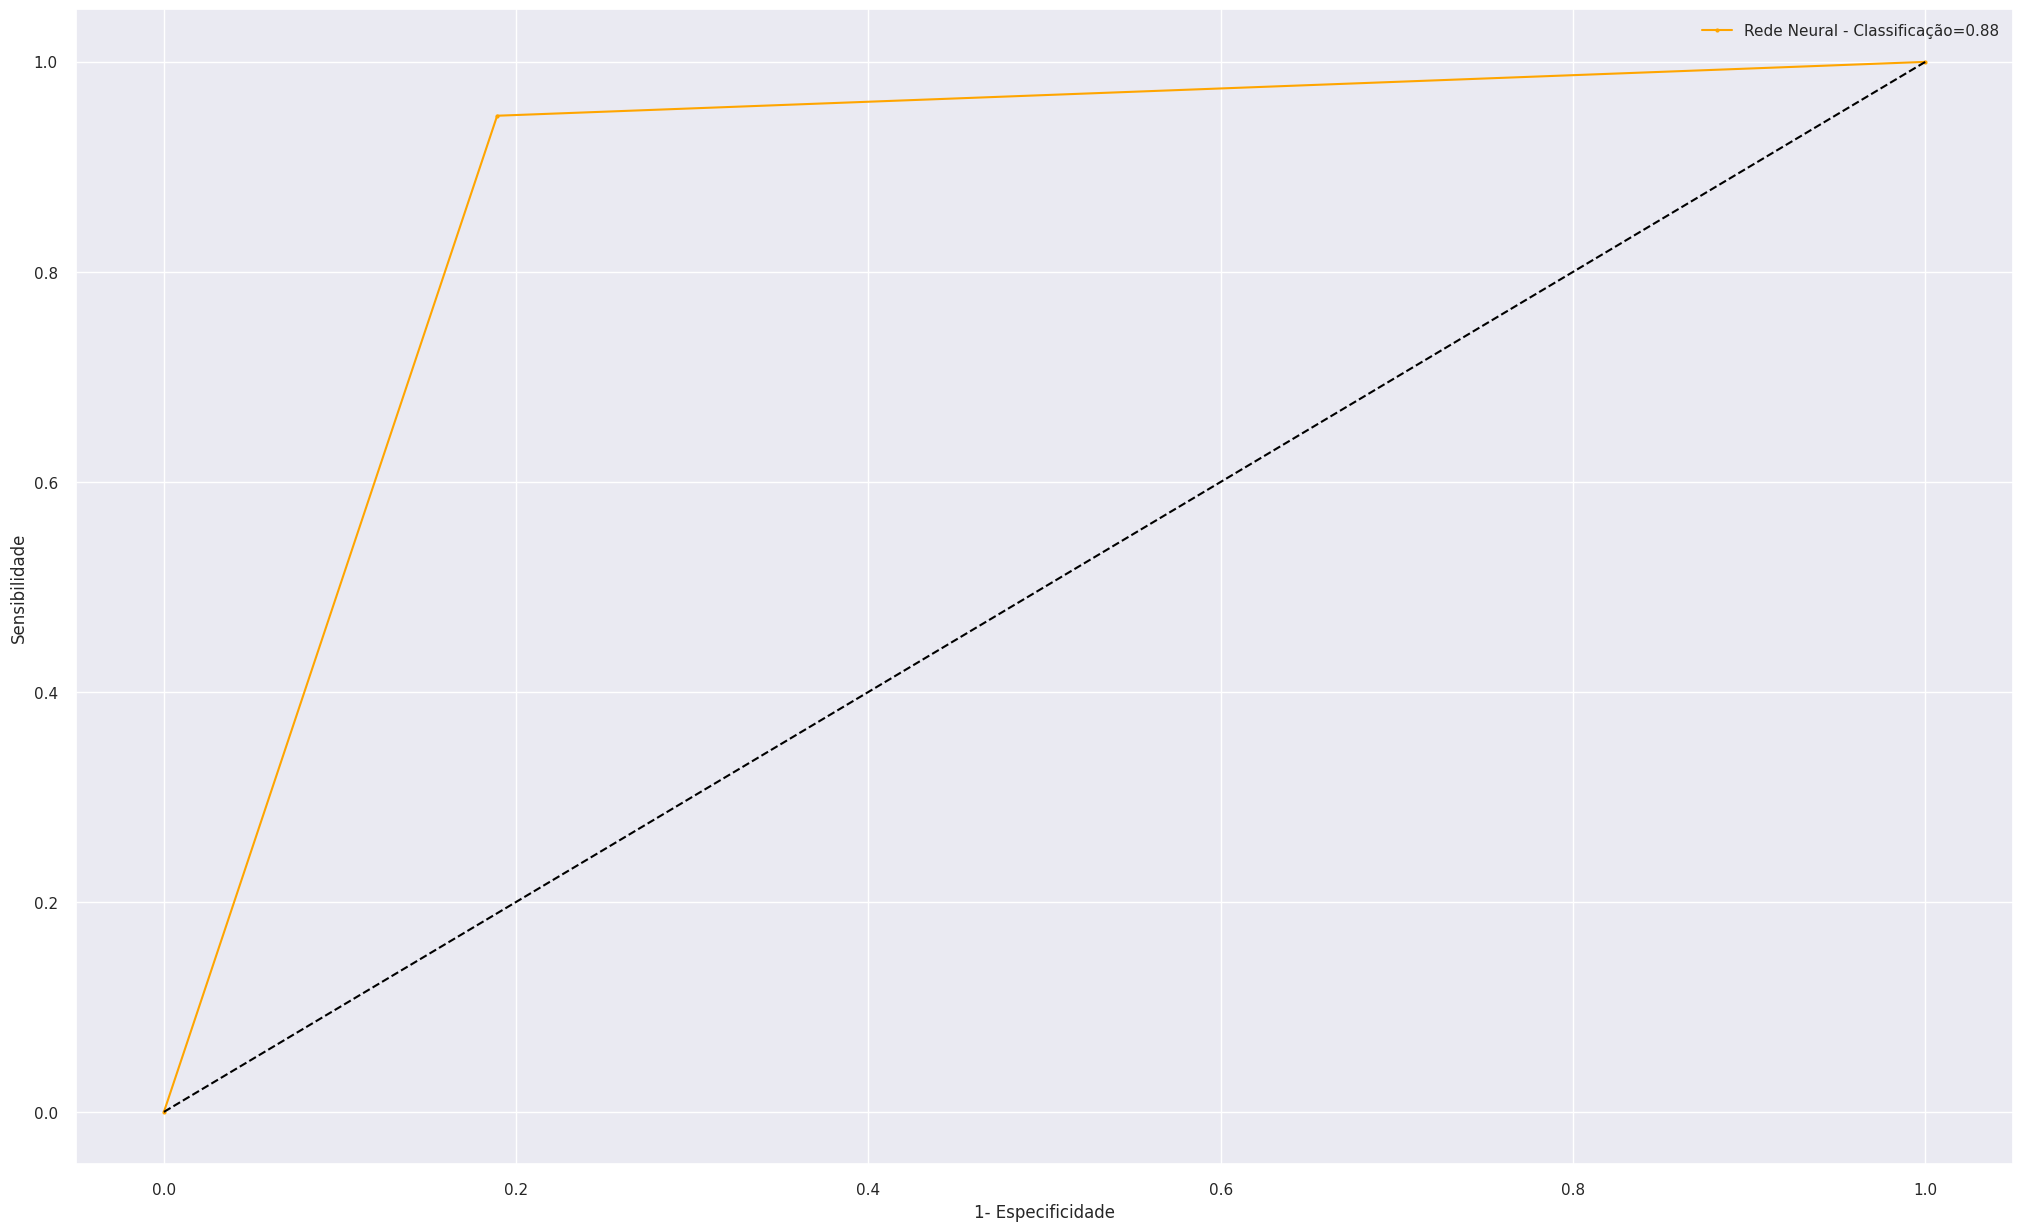

In [564]:
fp,vp,lim1 = roc_curve(y_teste,previsoes)
plt.plot(fp,vp, marker='.', label='Rede Neural - Classificação='+str(round(curva_roc,2)),color="orange")
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
# alterando o nome dos eixos
plt.xlabel('1- Especificidade')
plt.ylabel('Sensibilidade')
# Legenda
plt.legend()
# Mostrando o gráfico
plt.show()
#fig.savefig("images/mlpr_0305.png")

**Cross Validation ou Validação Cruzada**

In [565]:
import pandas as pd
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
import tensorflow as tf 

In [566]:
#dropout: é uma técnica, para reduzir o super treinamento (overfitting), que controla a
#porcentagem de neurônios desativados aleatoriamente durante o treinamento.
previsores = X
classe = y

def criarRede():
    classificador = Sequential()
    classificador.add(Dense(units = 16, activation = 'relu', 
                        kernel_initializer = 'random_uniform', input_dim = 13))
    classificador.add(Dropout(0.2))
    classificador.add(Dense(units = 16, activation = 'relu', 
                        kernel_initializer = 'random_uniform'))
    classificador.add(Dropout(0.2))
    classificador.add(Dense(units = 1, activation = 'sigmoid'))
    otimizador = tf.optimizers.Adam(learning_rate=0.001, clipvalue=0.5)
    classificador.compile(optimizer = otimizador, loss = 'binary_crossentropy',
                      metrics = ['binary_accuracy'])
    return classificador

In [567]:
classificador = KerasClassifier(build_fn = criarRede,
                                epochs = 100,
                                batch_size = 10)
resultados = cross_val_score(estimator = classificador,
                             X = previsores, y = classe,
                             cv = 10, scoring = 'accuracy')
media = resultados.mean()
desvio = resultados.std()

Epoch 1/100


<ipython-input-567-061ea446afeb>:1: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  classificador = KerasClassifier(build_fn = criarRede,


28/28 [==============================] - 1s 3ms/step - loss: 0.7076 - binary_accuracy: 0.5000
Epoch 2/100
28/28 [==============================] - 0s 3ms/step - loss: 0.6836 - binary_accuracy: 0.5588
Epoch 3/100
28/28 [==============================] - 0s 3ms/step - loss: 0.6778 - binary_accuracy: 0.5846
Epoch 4/100
28/28 [==============================] - 0s 3ms/step - loss: 0.6602 - binary_accuracy: 0.6434
Epoch 5/100
28/28 [==============================] - 0s 3ms/step - loss: 0.6588 - binary_accuracy: 0.6140
Epoch 6/100
28/28 [==============================] - 0s 3ms/step - loss: 0.6385 - binary_accuracy: 0.6581
Epoch 7/100
28/28 [==============================] - 0s 3ms/step - loss: 0.6360 - binary_accuracy: 0.6434
Epoch 8/100
28/28 [==============================] - 0s 3ms/step - loss: 0.6437 - binary_accuracy: 0.6324
Epoch 9/100
28/28 [==============================] - 0s 3ms/step - loss: 0.6435 - binary_accuracy: 0.6507
Epoch 10/100
28/28 [==============================] - 0s 3

In [568]:
print(media)
print(desvio)

0.7874193548387096
0.12176682310529881


**Tuning e Overfiting**

In [569]:
from sklearn.model_selection import GridSearchCV

In [571]:
#Mesma função com coisas a mais
def criarRede(optimizer, loos, kernel_initializer, activation, neurons):
    classificador = Sequential()
    classificador.add(Dense(units = neurons, activation = activation, 
                        kernel_initializer = kernel_initializer, input_dim = 13))
    #Dropout utilizado para corrigir ou amanizar o overfiting
    #O ideal é utilizar entre 0.20 e 0.30
    classificador.add(Dropout(0.2))
    classificador.add(Dense(units = neurons, activation = activation, 
                        kernel_initializer = kernel_initializer))
    classificador.add(Dropout(0.2))
    classificador.add(Dense(units = 1, activation = 'sigmoid'))
    classificador.compile(optimizer = optimizer, loss = loos,
                      metrics = ['binary_accuracy'])
    return classificador

In [573]:
classificador = KerasClassifier(build_fn = criarRede)
parametros = {'batch_size': [10, 30],
              'epochs': [50, 100],
              'optimizer': ['adam', 'sgd'],
              'loos': ['binary_crossentropy', 'hinge'],
              'kernel_initializer': ['random_uniform', 'normal'],
              'activation': ['relu', 'tanh'],
              'neurons': [16, 8]}

<ipython-input-573-041110182c5e>:1: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  classificador = KerasClassifier(build_fn = criarRede)


In [583]:
grid_search = GridSearchCV(estimator = classificador,
                           param_grid = parametros,
                           scoring = 'accuracy',
                           cv = 5)

In [ ]:
#Treinando com os parâmetros
grid_search = grid_search.fit(previsores, classe)
melhores_parametros = grid_search.best_params_
melhor_precisao = grid_search.best_score_

A saída de streaming foi truncada nas últimas 5000 linhas.
Epoch 28/100
25/25 [==============================] - 0s 3ms/step - loss: 1.0045 - binary_accuracy: 0.4835
Epoch 29/100
25/25 [==============================] - 0s 4ms/step - loss: 0.9726 - binary_accuracy: 0.5248
Epoch 30/100
25/25 [==============================] - 0s 4ms/step - loss: 0.9702 - binary_accuracy: 0.5248
Epoch 31/100
25/25 [==============================] - 0s 3ms/step - loss: 0.9527 - binary_accuracy: 0.5455
Epoch 32/100
25/25 [==============================] - 0s 4ms/step - loss: 0.9553 - binary_accuracy: 0.5124
Epoch 33/100
25/25 [==============================] - 0s 4ms/step - loss: 0.9446 - binary_accuracy: 0.5579
Epoch 34/100
25/25 [==============================] - 0s 4ms/step - loss: 0.9015 - binary_accuracy: 0.6240
Epoch 35/100
25/25 [==============================] - 0s 4ms/step - loss: 0.8985 - binary_accuracy: 0.6157
Epoch 36/100
25/25 [==============================] - 0s 4ms/step - loss: 0.9062 - bi

In [ ]:
print(melhores_parametros)
print(melhor_precisao)

**Classificar apenas um registro**


In [ ]:
novo = np.array([[15.80, 8.34, 118, 900, 0.10, 0.26, 0.08, 0.134, 0.178,
                  0.20, 0.05, 1098, 0.87, 4500, 145.2, 0.005, 0.04, 0.05, 0.015,
                  0.03, 0.007, 23.15, 16.64, 178.5, 2018, 0.14, 0.185,
                  0.84, 158, 0.363]])
previsao = grid_search.predict(novo)
previsao = (previsao > 0.5)
print(previsao)

NotFittedError: ignored

**Salvando um Rede Neural**

In [ ]:
previsores = pd.read_csv('entradas_breast.csv')
classe = pd.read_csv('saidas_breast.csv')

classificador = Sequential()
classificador.add(Dense(units = 8, activation = 'relu', 
                        kernel_initializer = 'normal', input_dim = 30))
classificador.add(Dropout(0.2))
classificador.add(Dense(units = 8, activation = 'relu', 
                        kernel_initializer = 'normal'))
classificador.add(Dropout(0.2))
classificador.add(Dense(units = 1, activation = 'sigmoid'))
classificador.compile(optimizer = 'adam', loss = 'binary_crossentropy',
                      metrics = ['binary_accuracy'])
classificador.fit(previsores, classe, batch_size = 10, epochs = 100)

classificador_json = classificador.to_json()
with open('classificador_breast.json', 'w') as json_file:
    json_file.write(classificador_json)
classificador.save_weights('classificador_breast.h5')

FileNotFoundError: ignored

**Carregando e compilando com outra função**

In [ ]:
arquivo = open('classificador_breast.json', 'r')
estrutura_rede = arquivo.read()
arquivo.close()

classificador = model_from_json(estrutura_rede)
classificador.load_weights('classificador_breast.h5')

novo = np.array([[15.80, 8.34, 118, 900, 0.10, 0.26, 0.08, 0.134, 0.178,
                  0.20, 0.05, 1098, 0.87, 4500, 145.2, 0.005, 0.04, 0.05, 0.015,
                  0.03, 0.007, 23.15, 16.64, 178.5, 2018, 0.14, 0.185,
                  0.84, 158, 0.363]])
previsao = classificador.predict(novo)
previsao = (previsao > 0.5)
print(previsao)

FileNotFoundError: ignored

In [ ]:
previsores = pd.read_csv('entradas_breast.csv')
classe = pd.read_csv('saidas_breast.csv')
#Usando outros parâmetros
classificador.compile(loss='binary_crossentropy', optimizer='adam', metrics=['binary_accuracy'])
resultado = classificador.evaluate(previsores, classe)
print(resultado)

FileNotFoundError: ignored

In [ ]:
#previsoes em probabilidade
previsoes = classificador.predict(X_teste)
print(previsoes)

AttributeError: ignored

In [ ]:
#Posso fazer as previsões
previsoes = (previsoes > 0.5)
print(previsoes)

NameError: ignored

## **RESULTADO**

O .............. foi o classificador que obteve o melhor resultado para  mesma base de dados, pois obteve resultado mais alto em todas as métricas (Acurácia, Precisão Recall, F1-Score, Kappa e Curva ROC)!